<center>بِسْمِ ٱللَّٰهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ</center>

# Milestones 1 Phase 1

# Credit Card Classification: Prediction of Credit Card Default

Ahmad Luay Adnani, Batch: FTDS-018-RMT

---

# i. Introduction

> This section contains the background analysis, problem statements and conceptual problems.

## Background

Credit card is as the payment method that makes every payment easier. However, each credit card user has their own behaviour in paying the amount of bill that they will get. Thus, default payment should be predicted if the credit card user is either responsible to pay the bill or not.

Default usually happens after six months in a row of not making at least the minimum payment due, which means your credit card is seriously delinquent. During that time you will be contacted by your creditor and they will want to know what you're going to do about it.

## Problem Statements

Knowing that default payment is important to predict to prevent users for not owing too much money from the credit card, then the problem statement will be: _do people with this particular credit card tend to have default payment_?

To answer this question, the analysis can be done by Classification models to predict `default_payment_next_month`, using classification machine learning:

- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- Other Algorithms (AdaBoostClassifier)

These algorithms are tested based on their baseline/default parameters, and then `cross-validation` will be applied to evaluate each model based on mean and also standard deviation. The better its cross-validation result, the high chance this algorithm to be chosen and proceeded to the next steps: Hyperparamter Tuning, so the predicition with hyperparameter tuning is expectedly to have a better result compared with the default parameters.

---

# ii. Query SQL
> This section contains SQL queries from Google Cloud Platform that were used in the data analysis.

```
SELECT
  limit_balance,
  CAST (sex AS INT64) AS sex,
  CAST (education_level AS INT64) AS education_level,
  CAST (marital_status AS INT64) AS marital_status,
  age,
  pay_0, pay_2, pay_3, pay_4,
  CAST (pay_5 AS FLOAT64) AS pay_5,
  CAST (pay_6 AS FLOAT64) AS pay_6,
  bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
  pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
  CAST (default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 35874
```

---

# iii. Importing Libraries

> This section contains the process of importing libraries and checking the version of the libraries that will be used in this analysis.

## Import Libraries

This section explains how to import the libraries that will be used in the analysis. The main library used for this analysis will be `scikit-learn`. In addition to scikit-learn, the libraries used in this analysis include `pandas`, `numpy`, `matplotlib`, and `seaborn`.

In [ ]:
!pip install feature_engine
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt

# handling outliers
from feature_engine.outliers import Winsorizer

# Split Dataset, Standarize, and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# import KNN
from sklearn.neighbors import KNeighborsClassifier

# import Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Evaluate Classification Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve,auc,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Save and Load Model
import pickle
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Libraries Version

This section explains how to check the version of the libraries that will be used in the analysis.

In [ ]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('scikit-learn version :',(sklearn.__version__))

pandas version : 1.4.4
numpy version : 1.22.4
matplotlib version : 3.5.3
seaborn version : 0.11.2
scikit-learn version : 1.2.2


---

# iv. Data Loading

> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, checking for missing values, checking for duplicated entries, and measuring of central tendency.

## Data Loading

This section explains the process of data loading. Dataset used in this analysis is `ml_dataset` from the `credit_card_default` on Google Cloud Platform database.

In [ ]:
# Data Loading
df= pd.read_csv('/content/h8dsft_P1M1_Ahmad Luay Adnani.csv')
# Displaying the top 10 rows of the dataset
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [ ]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


Following are the variables and definitions of each column in the dataset.

Variable | Definition
---|---
`limit_balance` | Amount of given credit in NT dollars (includes individual and family/supplementary credit)
`sex` | Gender (1=male, 2=female)
`education_level` | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
`marital_status` | Marital status (1=married, 2=single, 3=others)
`age` | Age in years
**Repayment Status** | Scale: (-2=no consumption, -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
`pay_0` | Repayment status in September, 2005 (scale same as above)
`pay_2` | Repayment status in August, 2005 (scale same as above)
`pay_3` | Repayment status in July, 2005 (scale same as above)
`pay_4` | Repayment status in June, 2005 (scale same as above)
`pay_5` | Repayment status in May, 2005 (scale same as above)
`pay_6` | Repayment status in April, 2005 (scale same as above)
**Billing Amount** | in NT dollar
`bill_amt_1` | Amount of bill statement in September, 2005 (NT dollar)
`bill_amt_2` | Amount of bill statement in August, 2005 (NT dollar)
`bill_amt_3` | Amount of bill statement in July, 2005 (NT dollar)
`bill_amt_4` | Amount of bill statement in June, 2005 (NT dollar)
`bill_amt_5` | Amount of bill statement in May, 2005 (NT dollar)
`bill_amt_6` | Amount of bill statement in April, 2005 (NT dollar)
**Previous Payment** | in NT dollar
`pay_amt_1` | Amount of previous payment in September, 2005 (NT dollar)
`pay_amt_2` | Amount of previous payment in August, 2005 (NT dollar)
`pay_amt_3` | Amount of previous payment in July, 2005 (NT dollar)
`pay_amt_4` | Amount of previous payment in June, 2005 (NT dollar)
`pay_amt_5` | Amount of previous payment in May, 2005 (NT dollar)
`pay_amt_6` | Amount of previous payment in April, 2005 (NT dollar)
**Default Payment** | Target
`default_payment_next_month` | Default payment (1=yes, 0=no)

## Size of Dataset

This section explains how to check the size of the dataset.

In [ ]:
# size of dataset
df.shape

(2965, 24)

## Information
This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [ ]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

## Missing Values
This section explains the process for checking missing values.


In [ ]:
# check for missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

## Checking for Duplicated Data
This section explains the process to check for duplicated data in the dataset.

In [ ]:
# Check for duplicated entries
df.duplicated().value_counts()

False    2964
True        1
dtype: int64

Duplicated data in this dataset will not be dropped. It is necessary to check again on the original dataset on Google Cloud Platform because there are still columns that are not included in the query.

## Measure of Central Tendency
The following are the measure of central tendency of the dataset used in this analysis.

In [ ]:
# measure of central tendency
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


# v. Exploratory Data Analysis

> This section contains data exploration of the dataset used in this analysis. Two exploratory data analyses are carried out: one to find general information and another to analyze the correlation matrix.

## Numerical and Categorical Columns

This section describes the process for classifying numerical and categorical data in a dataset.

In [ ]:
# Unique Value counts of all columns
df_copy =df.copy()
for i in df_copy:
    print(i,':')
    print()
    print(df_copy[i].unique())
    print('-' * 10)

limit_balance :

[ 80000. 200000.  20000. 260000. 150000. 300000. 130000. 500000. 230000.
 460000. 780000. 170000. 320000. 290000. 240000. 340000. 360000. 380000.
 180000. 100000.  90000.  50000. 160000.  70000. 280000. 220000.  30000.
 120000.  10000. 470000. 310000. 140000.  60000. 110000. 430000. 210000.
 490000. 330000. 250000. 400000. 370000. 440000. 700000. 530000. 390000.
 410000. 270000. 560000.  40000. 680000. 480000. 190000. 350000. 420000.
 510000. 800000. 450000. 750000. 620000.]
----------
sex :

[1 2]
----------
education_level :

[6 4 1 2 3 5 0]
----------
marital_status :

[1 2 3 0]
----------
age :

[54. 49. 22. 33. 32. 45. 58. 39. 48. 34. 47. 46. 30. 35. 55. 42. 56. 31.
 53. 40. 36. 51. 37. 44. 24. 38. 26. 25. 23. 27. 28. 29. 41. 63. 50. 43.
 66. 61. 52. 62. 69. 21. 65. 57. 64. 67. 60. 59. 68.]
----------
pay_0 :

[ 0.  2.  1. -1. -2.  3.  4.  5.  6.  7.  8.]
----------
pay_2 :

[ 0. -1.  2.  3. -2.  4.  1.  5.  6.  7.]
----------
pay_3 :

[ 0.  2. -2.  3. -1.  4.  5.

In [ ]:
# separating numerical and categorical columns
numerical = ['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']
print('Numerical Column :',numerical)
categorical = ['sex', 'education_level', 'marital_status', 
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',  'default_payment_next_month']
print('Categorical Column :',categorical)


Numerical Column : ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Column : ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']


## Gender
This section explains the process of data exploration to determine the gender of each credit card user.

In [ ]:
# sex  value count
df.sex .value_counts().to_frame()

,sex
2,1802
1,1163


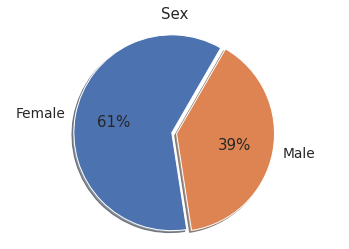

In [ ]:
#create pie chart
sns.set(font_scale=1.25)
labels = 'Female', 'Male'
colors = sns.color_palette('deep')
explode = (0.05, 0)

plt.pie(df.sex.value_counts(),explode=explode,labels=labels, colors = colors, autopct='%.0f%%',shadow=True,startangle=60)

plt.axis('equal')
plt.title('Sex')
plt.show()

Based on the table and visualization above, the number of female credit card users is __22% more__ than the number of male credit card users. Based on my assumptions, this is because women shop more often using credit cards than men.

## Default Payment
This section explains the process of data exploration to determine the number of credit card users who will default on their credit card in the next month.

In [ ]:
# default payment  value count
df.default_payment_next_month .value_counts().to_frame()

,default_payment_next_month
0,2330
1,635


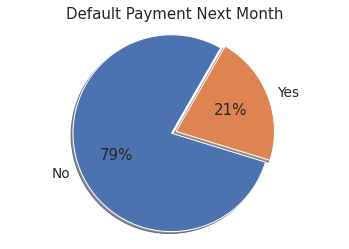

In [ ]:
#create pie chart
sns.set(font_scale=1.25)
labels = 'No', 'Yes'
colors = sns.color_palette('deep')
explode = (0.05, 0)

plt.pie(df.default_payment_next_month.value_counts(),explode=explode,labels=labels, colors = colors, autopct='%.0f%%',shadow=True,startangle=60)

plt.axis('equal')
plt.title('Default Payment Next Month')
plt.show()

Based on the table and visualization above, there is an imbalance in the number of credit card users who will default on their credit card in the next month. This will affect the classification process by the model that we define (`precision` and `recall` value).

### Gender based on Default

This section explains the process of data exploration to determine the gender of each credit card user who will default on their credit card in the next month. 

In [ ]:
# gender value count
sex = df.groupby(by=['sex','default_payment_next_month']).aggregate({'default_payment_next_month':'count'})
sex

default_payment_next_month
sex default_payment_next_month                            
1   0                                                  901
    1                                                  262
2   0                                                 1429
    1                                                  373

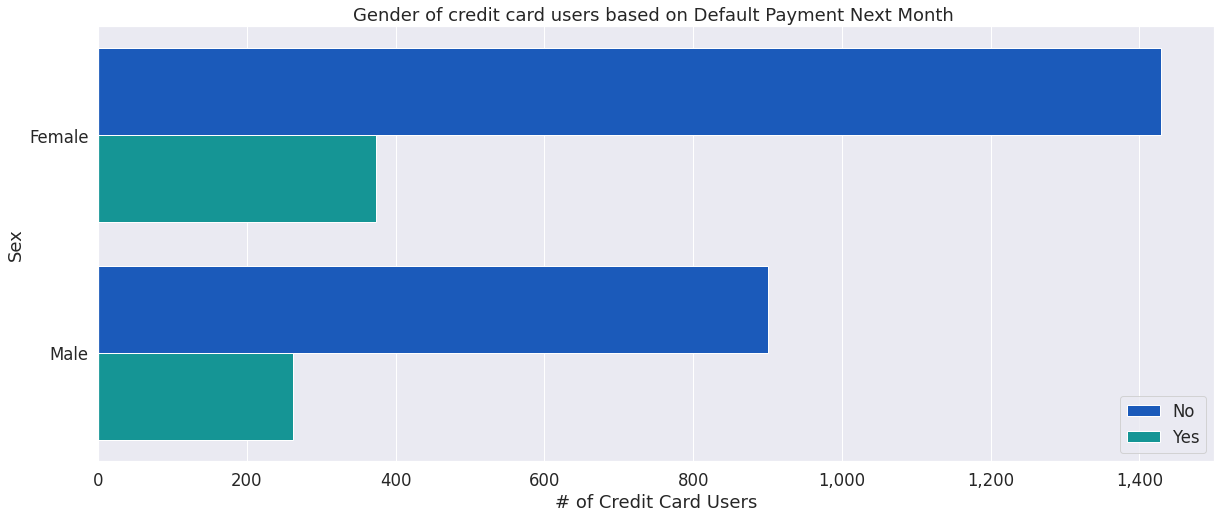

In [ ]:
# create bar chart
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(y=df.sex, hue=df.default_payment_next_month,palette='winter',order=df.sex.value_counts().index)

plt.title('Gender of credit card users based on Default Payment Next Month ')
plt.xlabel('# of Credit Card Users')
plt.ylabel('Sex')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='lower right',labels=['No','Yes'])
plt.yticks([0,1],['Female','Male'])
plt.show()

Based on the table and visualization above, A number of __373 out of 2965 (or 13%)__ of female credit card users and __262 out of 2965 (or 9% )__ of male credit card users will default on their credit card in the next month. 

## Education Level

This section explains the process of exploring the data to determine the education level of each credit card user based on their gender.

In [ ]:
# education level  value count
df.groupby(by=['education_level','default_payment_next_month']).aggregate({'default_payment_next_month':'count'})

default_payment_next_month
education_level default_payment_next_month                            
0               0                                                    2
1               0                                                  862
                1                                                  177
2               0                                                 1058
                1                                                  342
3               0                                                  370
                1                                                  113
4               0                                                   13
5               0                                                   23
                1                                                    1
6               0                                                    2
                1                                                    2

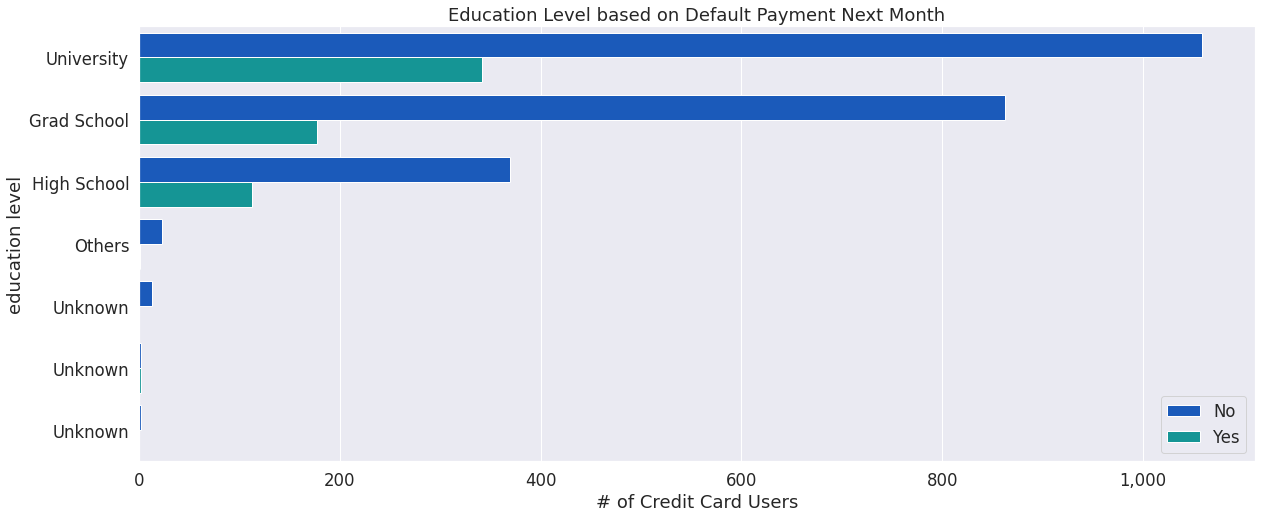

In [ ]:
# create bar chart
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(y=df.education_level, hue=df.default_payment_next_month,palette='winter',order=df.education_level.value_counts().index)

plt.title('Education Level based on Default Payment Next Month')
plt.xlabel('# of Credit Card Users')
plt.ylabel('education level')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='lower right',labels=['No','Yes'])
plt.yticks([0,1,2,3,4,5,6],['University','Grad School','High School','Others','Unknown','Unknown','Unknown'])
plt.show()

From the table and visualization above, the majority of credit card users are __university graduates__ (2). Based on my assumption, the higher the education level, the greater the desire to shop using a credit card.

## Marital Status Based on Age
This section explains the process of exploring the data to find out the marital status of each credit card user based on their age.


In [ ]:
# marital status value count
df.groupby(by=['marital_status']).aggregate({'default_payment_next_month':'count'})

,default_payment_next_month
marital_status,
0,4
1,1332
2,1594
3,35


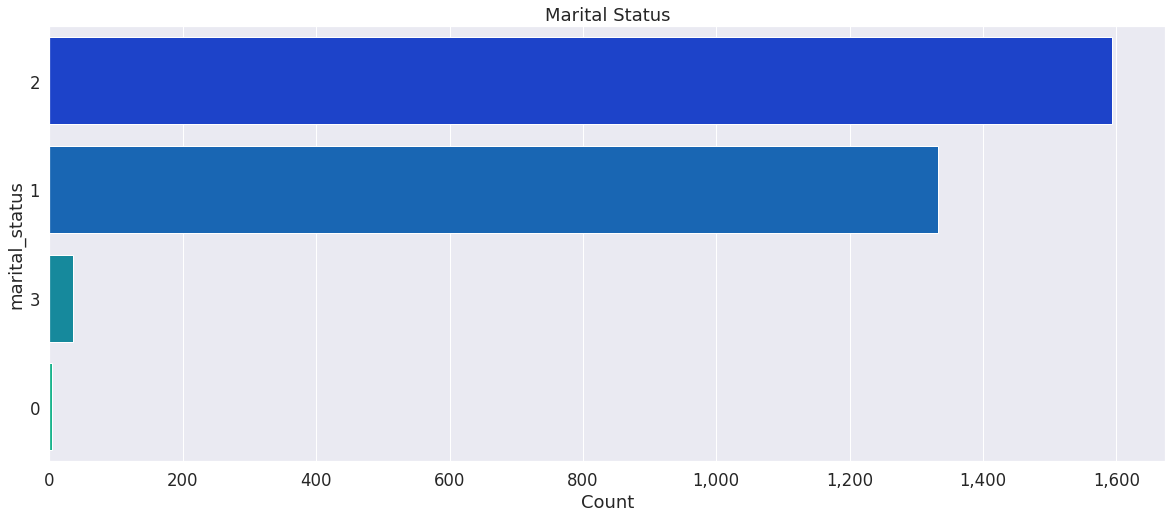

In [ ]:
# create bar chart
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(y=df.marital_status,palette='winter',order=df.marital_status.value_counts().index)

plt.title('Marital Status')
plt.xlabel('Count')
plt.ylabel('marital_status')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Based on the table and visualization above, the majority of credit card users are single. based on my assumption, married credit card users only have 1 credit card for 1 household

## Correlation Matrix Analysis

This section explains about correlation matrix analysis to find out the correlation between features and target (default_payment_next_month).

In [ ]:
# Categorical Column list
cat_col = ['sex', 'education_level', 'marital_status', 
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',  'default_payment_next_month']
print(cat_col)

['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']


The cell below explains the process of performing a correlation matrix analysis to identify the features that are most strongly correlated with the target (`default_payment_next_month`). To accomplish this, categorical data will be converted into numerical data using the `LabelEncoder` library.

In [ ]:
# Using LabelEncoder to convert categorical into numerical data
m_LabelEncoder = LabelEncoder()

for col in df_copy[cat_col]:
    df_copy[col]=m_LabelEncoder.fit_transform(df_copy[col])
df_copy.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,0,6,1,54.0,2,2,2,2,2,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,0,4,1,49.0,2,2,2,2,2,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,1,6,2,22.0,2,2,2,2,2,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,1,4,2,33.0,2,2,2,2,2,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,0,4,2,32.0,2,2,2,1,2,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


<AxesSubplot:>

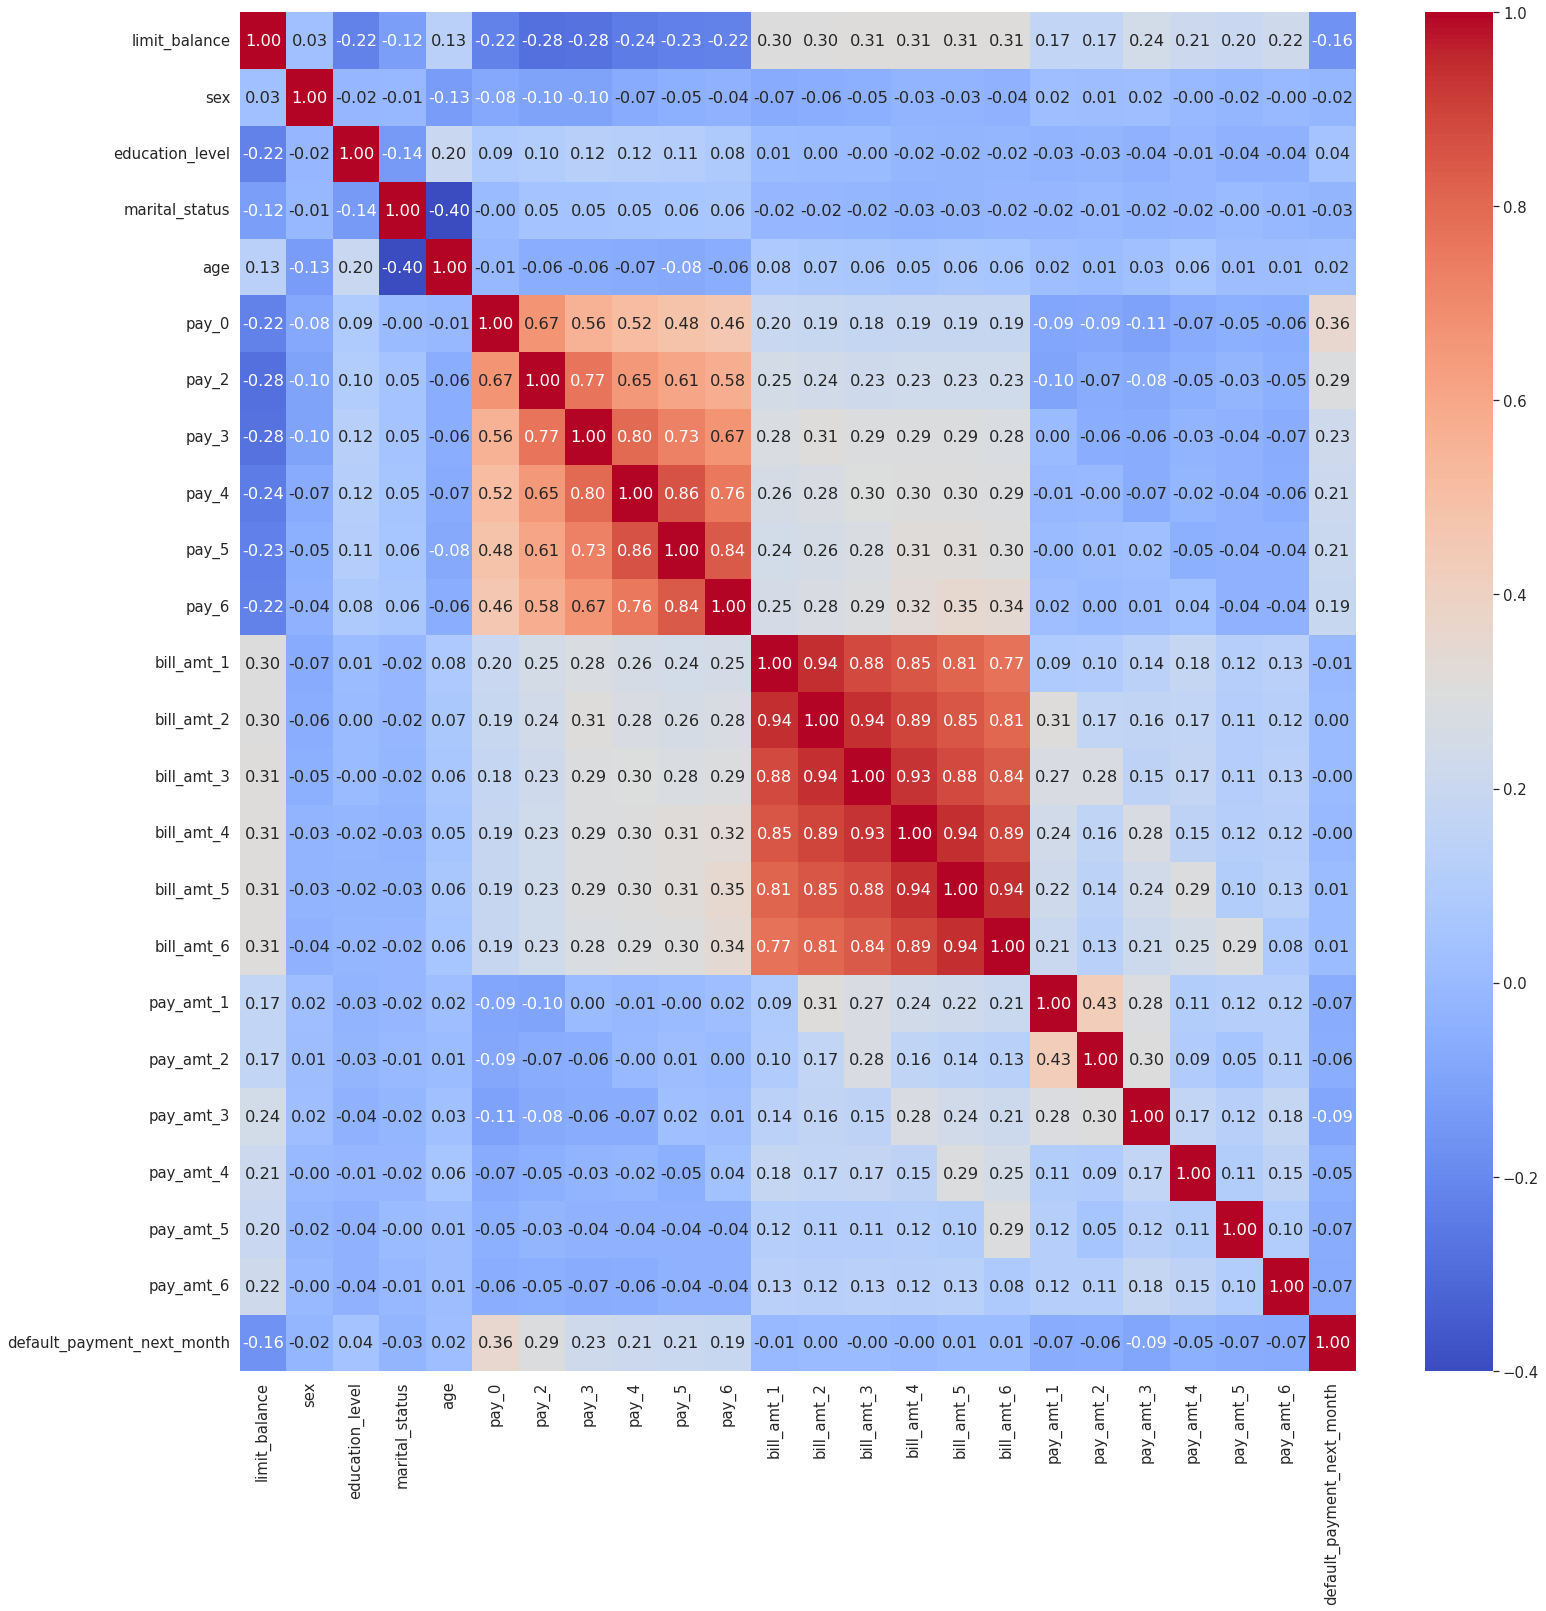

In [ ]:
# Plotting Correlation Matrix of Categorical columns and default_payment
sns.set(font_scale=1.35)
plt.figure(figsize=(25,25))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm', fmt='.2f')

According to the above visualization, the `education_level`, `sex`, `marital_status` has a low correlation to the target (`default_payment_next_month`).

---

# vi. Feature Engineering / Data Preprocessing
> This section explains the process of preparing data for the model training process, such as data cleaning, creating data inference, separating data into train-tests, data transformation (normalization, encoding, etc.), and other processes needed.

## Data Inference
This section explains how to create a data inference. Data inference is distinct from the train and test set, as it is still based on the original dataset and used to evaluate the model's performance on new, raw data. To create the data inference, we will set aside 10 data from the original dataset.

In [ ]:
# Creating data inference
data = df.copy()
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 24)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,300000.0,1,1,2,25.0,0.0,0.0,0.0,0.0,0,...,19507.0,18169.0,18533.0,4103.0,1427.0,600.0,1200.0,2500.0,18000.0,0
1,170000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,66496.0,36000.0,25167.0,3600.0,3000.0,4710.0,1500.0,1000.0,1000.0,0
2,420000.0,1,2,1,36.0,0.0,0.0,0.0,0.0,0,...,22304.0,28465.0,38182.0,15005.0,10013.0,10000.0,10000.0,20000.0,20000.0,0
3,130000.0,2,2,2,31.0,0.0,0.0,0.0,0.0,0,...,103750.0,105818.0,98401.0,4000.0,5300.0,3700.0,3600.0,3700.0,3500.0,0
4,50000.0,1,2,2,28.0,-1.0,2.0,-1.0,0.0,0,...,937.0,-3.0,894.0,0.0,3141.0,2.0,0.0,897.0,906.0,0
5,450000.0,2,3,2,40.0,-1.0,-1.0,-1.0,-1.0,0,...,14602.0,18065.0,19239.0,26731.0,55367.0,15174.0,10528.0,10037.0,48551.0,0
6,240000.0,2,2,1,41.0,1.0,-1.0,-1.0,-1.0,-1,...,9795.0,11756.0,12522.0,40529.0,3211.0,9795.0,11756.0,12522.0,6199.0,0
7,30000.0,2,2,2,22.0,-1.0,0.0,-1.0,-1.0,-1,...,3312.0,3145.0,3022.0,1009.0,5572.0,3321.0,3154.0,3031.0,3339.0,0
8,100000.0,1,2,2,30.0,-2.0,-2.0,-2.0,-2.0,-2,...,0.0,1756.0,0.0,1475.0,0.0,0.0,1756.0,0.0,0.0,0
9,260000.0,2,3,2,49.0,-2.0,-2.0,-2.0,-2.0,-2,...,2735.0,316.0,305.0,217773.0,200304.0,2759.0,316.0,305.0,2596.0,0


In [ ]:
# Saving data inference as .csv file
df_inf.to_csv('h8dsft_p1m1_Ahmad Luay Adnani_inference.csv')

In [ ]:
# Removing inference from dataset 
df_train_test = data.drop(df_inf.index)
print('size of original dataset (rows,columns) :',data.shape)
print('size of dataset after data inference is removed (rows,columns) :',df_train_test.shape)
df_train_test.head()

size of original dataset (rows,columns) : (2965, 24)
size of dataset after data inference is removed (rows,columns) : (2955, 24)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


## Separating Dataset into Training Set and Testing Set
 This section explains how to separate dataset into training set and testing set.

In [ ]:
# Defining X and y (removing unnecesary features)
X = df_train_test.drop(['default_payment_next_month'],axis=1)
y = pd.DataFrame(df_train_test['default_payment_next_month'])
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


In [ ]:
# Separating Dataset into Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  # features
                                                   y, # target = default_payment_next_month
                                                   test_size=0.3, # test_set 30%
                                                   random_state=0) 

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
X_train = X_train.sort_index()
X_train

Train Size:  (2068, 23)
Test Size:  (887, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0,...,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


In [ ]:
# X_test set
X_test = X_test.sort_index()
X_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0
10,460000.0,1,1,1,49.0,0.0,0.0,0.0,0.0,0,...,295807.0,291616.0,289529.0,289449.0,13200.0,14000.0,11500.0,10500.0,10500.0,10000.0
14,290000.0,1,1,1,46.0,0.0,0.0,0.0,0.0,0,...,198684.0,87700.0,88621.0,53243.0,10744.0,6000.0,1573.0,1629.0,3129.0,105423.0
15,500000.0,1,1,1,30.0,0.0,0.0,0.0,0.0,0,...,78031.0,78946.0,76689.0,77968.0,2800.0,3500.0,2818.0,2743.0,3000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,180000.0,2,2,1,35.0,-1.0,-1.0,-1.0,-1.0,-2,...,360.0,0.0,0.0,414.0,590.0,360.0,0.0,0.0,414.0,0.0
2951,160000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,2941.0,0.0,0.0,0.0,0.0,0.0
2954,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2,...,16666.0,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2,...,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0


In [ ]:
# y_train set
y_train = y_train.sort_index()
y_train

,default_payment_next_month
0,1
1,0
2,1
3,0
5,0
...,...
2960,0
2961,1
2962,1
2963,0


In [ ]:
# y_test set
y_test = y_test.sort_index()
y_test

,default_payment_next_month
4,0
9,0
10,0
14,0
15,0
...,...
2949,0
2951,0
2954,0
2956,0


## Check the distribution of data
This section explains how to check the distribution of the data. The histogram and boxplot visualizations below show the distribution of numerical data in the train set.

In [ ]:
# numerical columns
num_col = ['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

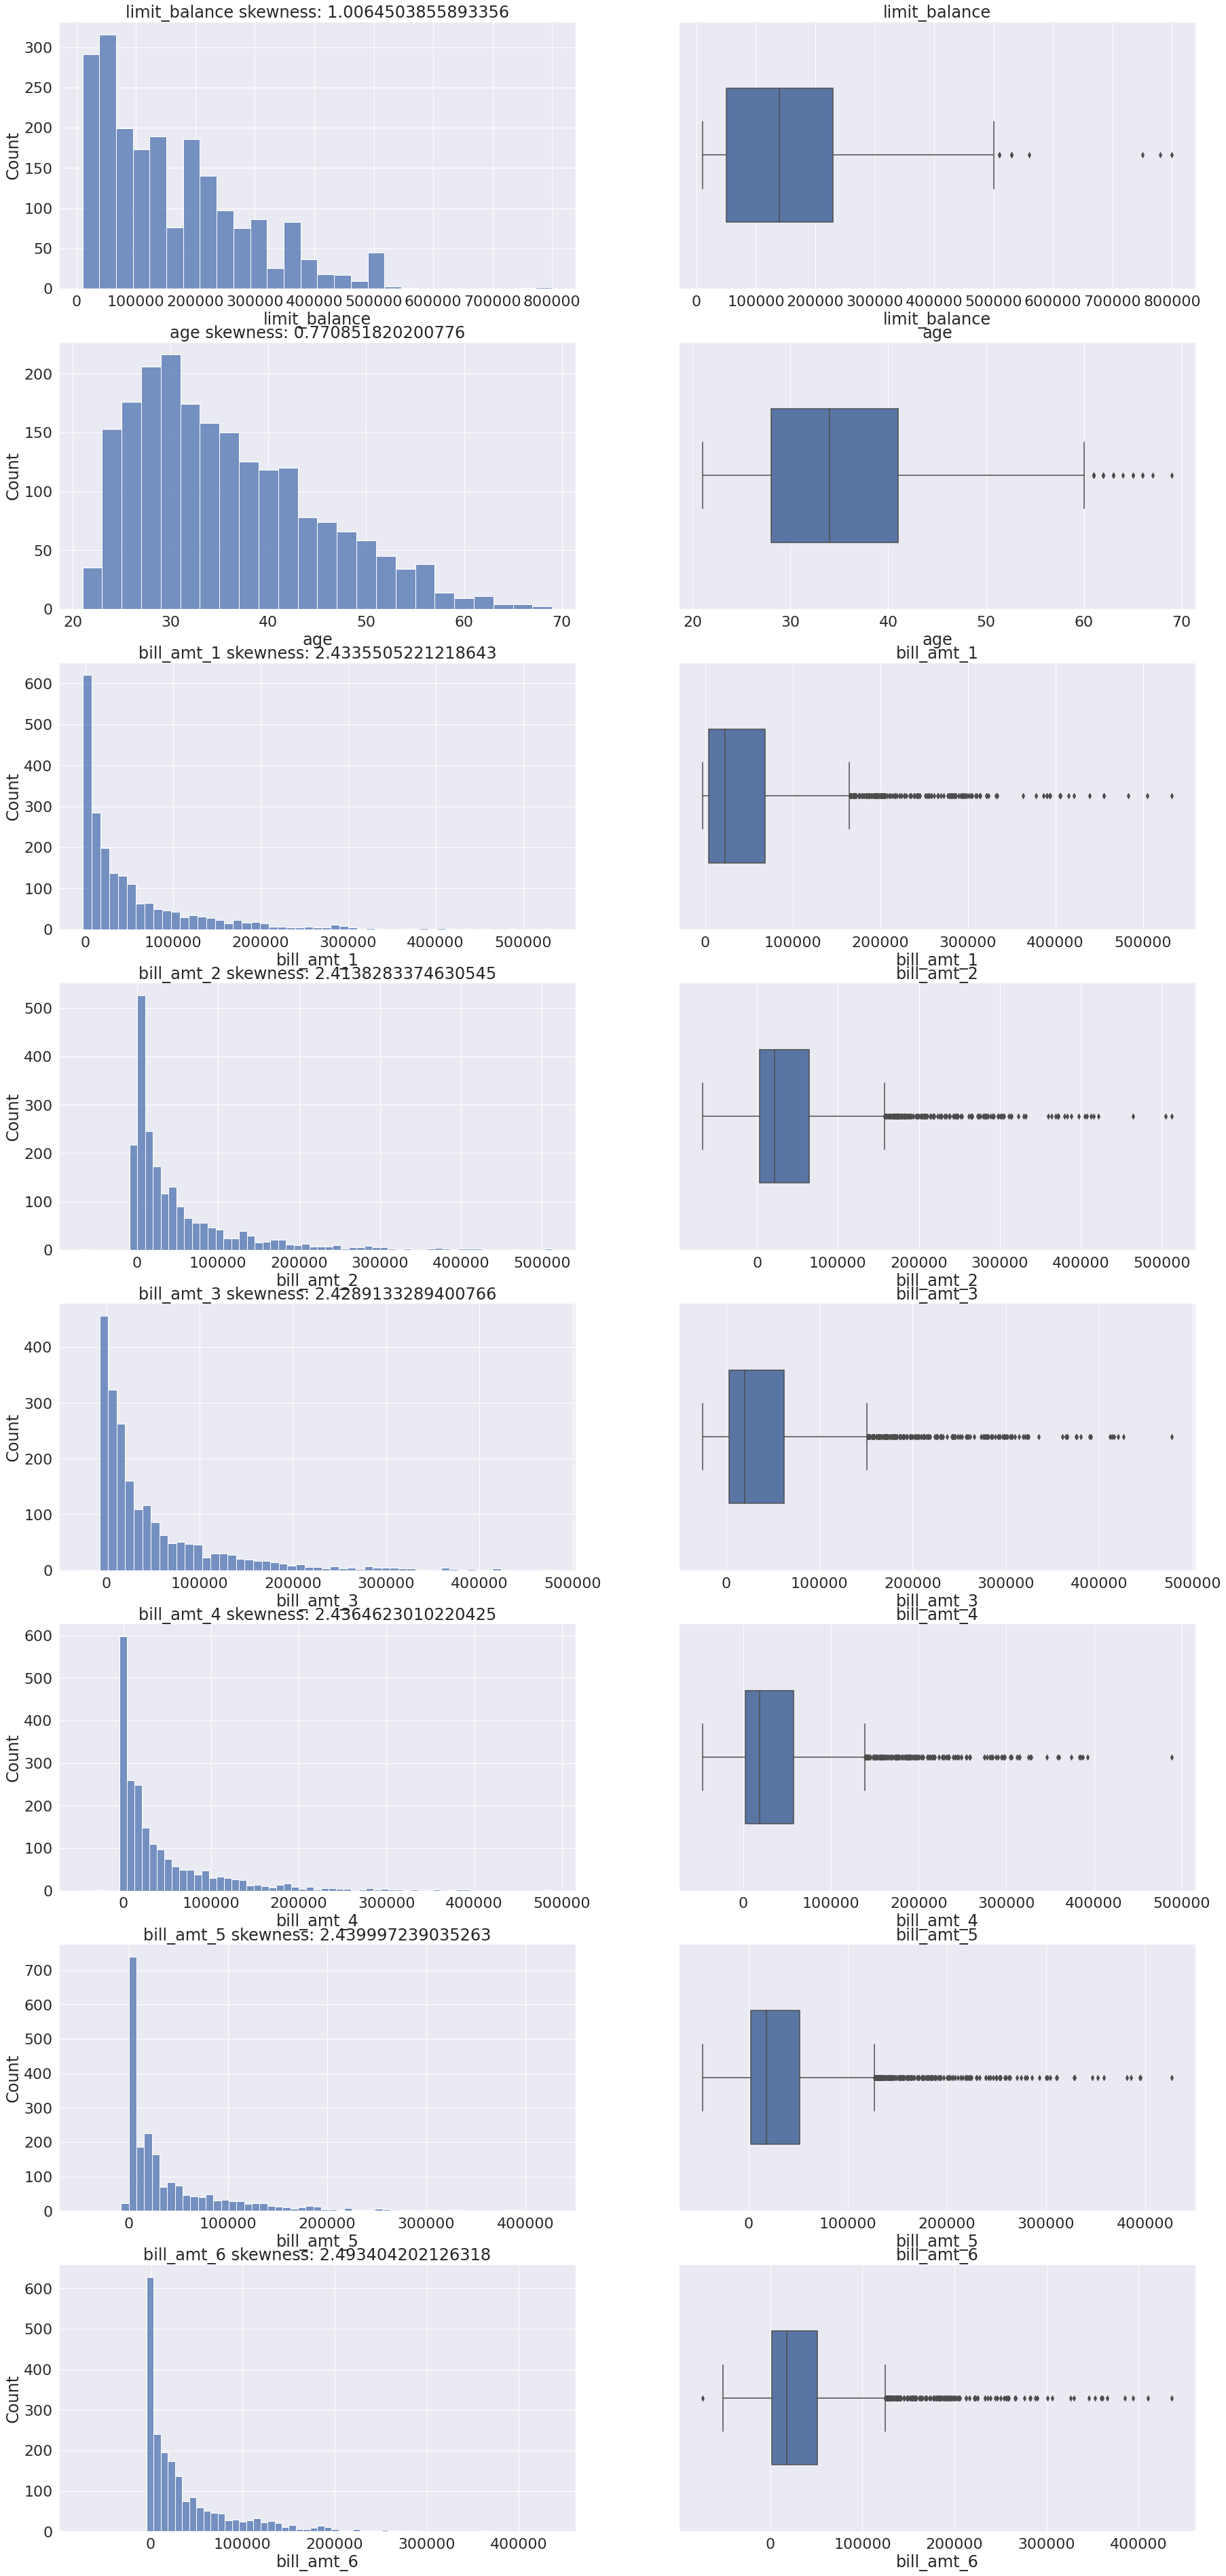

In [ ]:
# plot histogram and boxplot
# numerical columns
num_col_1 = ['limit_balance', 'age','bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
num = X_train[num_col_1]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.histplot(ax=ax[i,0],data=X_train[col])
    ax[i,0].set_title(f'{col} skewness: {X_train[col].skew()}')
    sns.boxplot(ax=ax[i,1],data=X_train,x=X_train[col],width=0.50)
    ax[i,1].set_title(col)

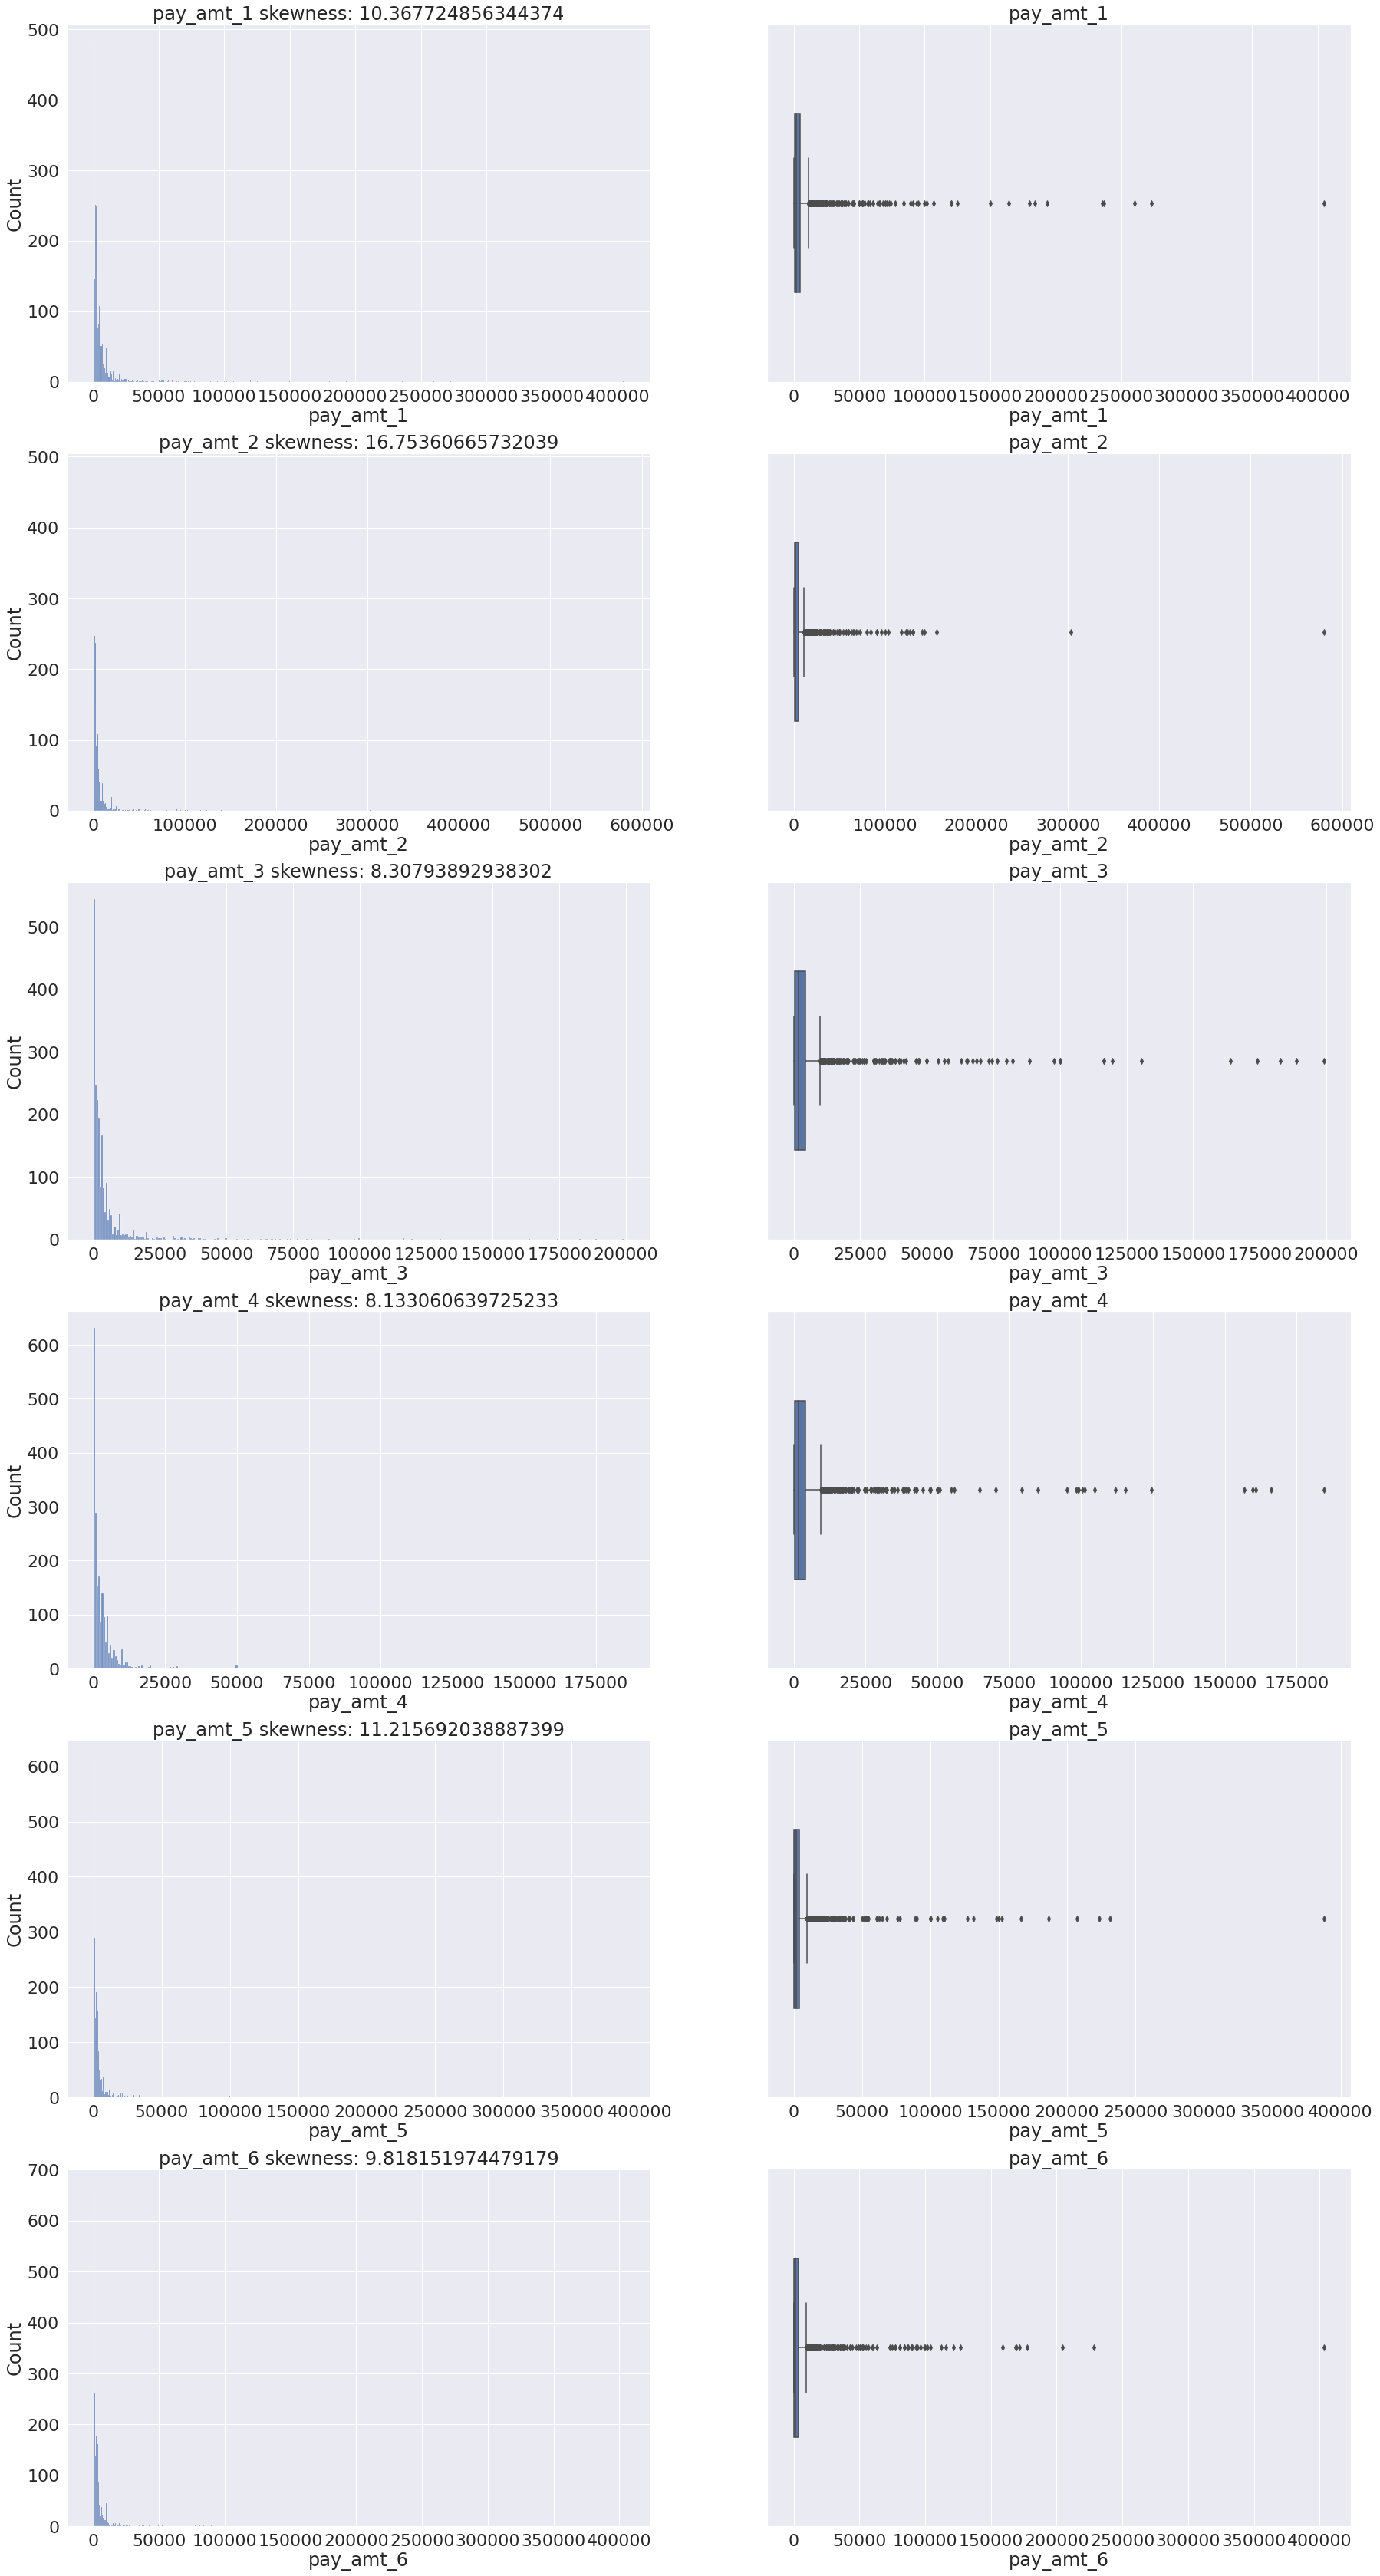

In [ ]:
# plot histogram and boxplot
# numerical columns
num_col_2 = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']
num = X_train[num_col_2]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,60))
for i in range(n):
    col = num.columns[i]
    sns.histplot(ax=ax[i,0],data=X_train[col])
    ax[i,0].set_title(f'{col} skewness: {X_train[col].skew()}')
    sns.boxplot(ax=ax[i,1],data=X_train,x=X_train[col],width=0.50)
    ax[i,1].set_title(col)

In [ ]:
# Create Function to calculate skewness
def skewness(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    print(f'Disribution of {col} : Normal Distribution')
  else:
    print(f'Disribution of {col} : Skewed Distribution')

In [ ]:
# Distribution
num = X_train[num_col]
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    skewness(X_train,col)

Disribution of limit_balance : Skewed Distribution
Disribution of age : Skewed Distribution
Disribution of bill_amt_1 : Skewed Distribution
Disribution of bill_amt_2 : Skewed Distribution
Disribution of bill_amt_3 : Skewed Distribution
Disribution of bill_amt_4 : Skewed Distribution
Disribution of bill_amt_5 : Skewed Distribution
Disribution of bill_amt_6 : Skewed Distribution
Disribution of pay_amt_1 : Skewed Distribution
Disribution of pay_amt_2 : Skewed Distribution
Disribution of pay_amt_3 : Skewed Distribution
Disribution of pay_amt_4 : Skewed Distribution
Disribution of pay_amt_5 : Skewed Distribution
Disribution of pay_amt_6 : Skewed Distribution


## Handling Outliers
This section explains how to handle outliers in the train and test set.

In [ ]:
# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*X_train[col].std()
    lower = df[col].mean() - 3*X_train[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

### Train set

In [ ]:
# percentage of outlier in train set
num = X_train[num_col]
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    out,no_out, up, low = outlier_analysis (X_train,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(X_train))*100, '%') 
    print('-'*20)

column name: limit_balance
count of outlier:  9
percentage of outlier:  0.43520309477756286 %
--------------------
column name: age
count of outlier:  21
percentage of outlier:  1.0154738878143132 %
--------------------
column name: bill_amt_1
count of outlier:  166
percentage of outlier:  8.027079303675048 %
--------------------
column name: bill_amt_2
count of outlier:  169
percentage of outlier:  8.172147001934237 %
--------------------
column name: bill_amt_3
count of outlier:  163
percentage of outlier:  7.88201160541586 %
--------------------
column name: bill_amt_4
count of outlier:  152
percentage of outlier:  7.35009671179884 %
--------------------
column name: bill_amt_5
count of outlier:  182
percentage of outlier:  8.800773694390715 %
--------------------
column name: bill_amt_6
count of outlier:  175
percentage of outlier:  8.462282398452611 %
--------------------
column name: pay_amt_1
count of outlier:  196
percentage of outlier:  9.477756286266924 %
--------------------

For columns with an outlier percentage less than 1%, handling outliers will be done using **trimming**, the rest will be handled using **capping**.

In [ ]:
# handling outlier in train set
X_train_trimmed = X_train.copy()
y_train_trimmed = y_train.copy()

num = X_train[num_col]
n=len(num.columns)
for i in range(n):
  col = num.columns[i]
  out,no_out, up, low = outlier_analysis(X_train_trimmed,col)
  pct_out = (len(out)/len(X_train))*100

  if pct_out <= 1: # outliers below 1% will be removed
    X_train_trimmed = X_train_trimmed[(X_train_trimmed[col]>=low) & (X_train_trimmed[col]<=up)]
    y_train_trimmed.drop(index = out.index,inplace=True)

print(f"Size of X_train set - before outlier handling: {len(X_train)}") 
print(f"Size of X_train set - after outlier handling: {len(X_train_trimmed)}")
print(f"Size of y_train set - before outlier handling: {len(y_train)}") 
print(f"Size of y_train set - after outlier handling: {len(y_train_trimmed)}")

Size of X_train set - before outlier handling: 2068
Size of X_train set - after outlier handling: 2039
Size of y_train set - before outlier handling: 2068
Size of y_train set - after outlier handling: 2039


In [ ]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_col)
X_train_capped = wins.fit_transform(X_train_trimmed)
print('Size of dataset - After Capped  : ', X_train_capped.shape)

Size of dataset - After Capped  :  (2039, 23)


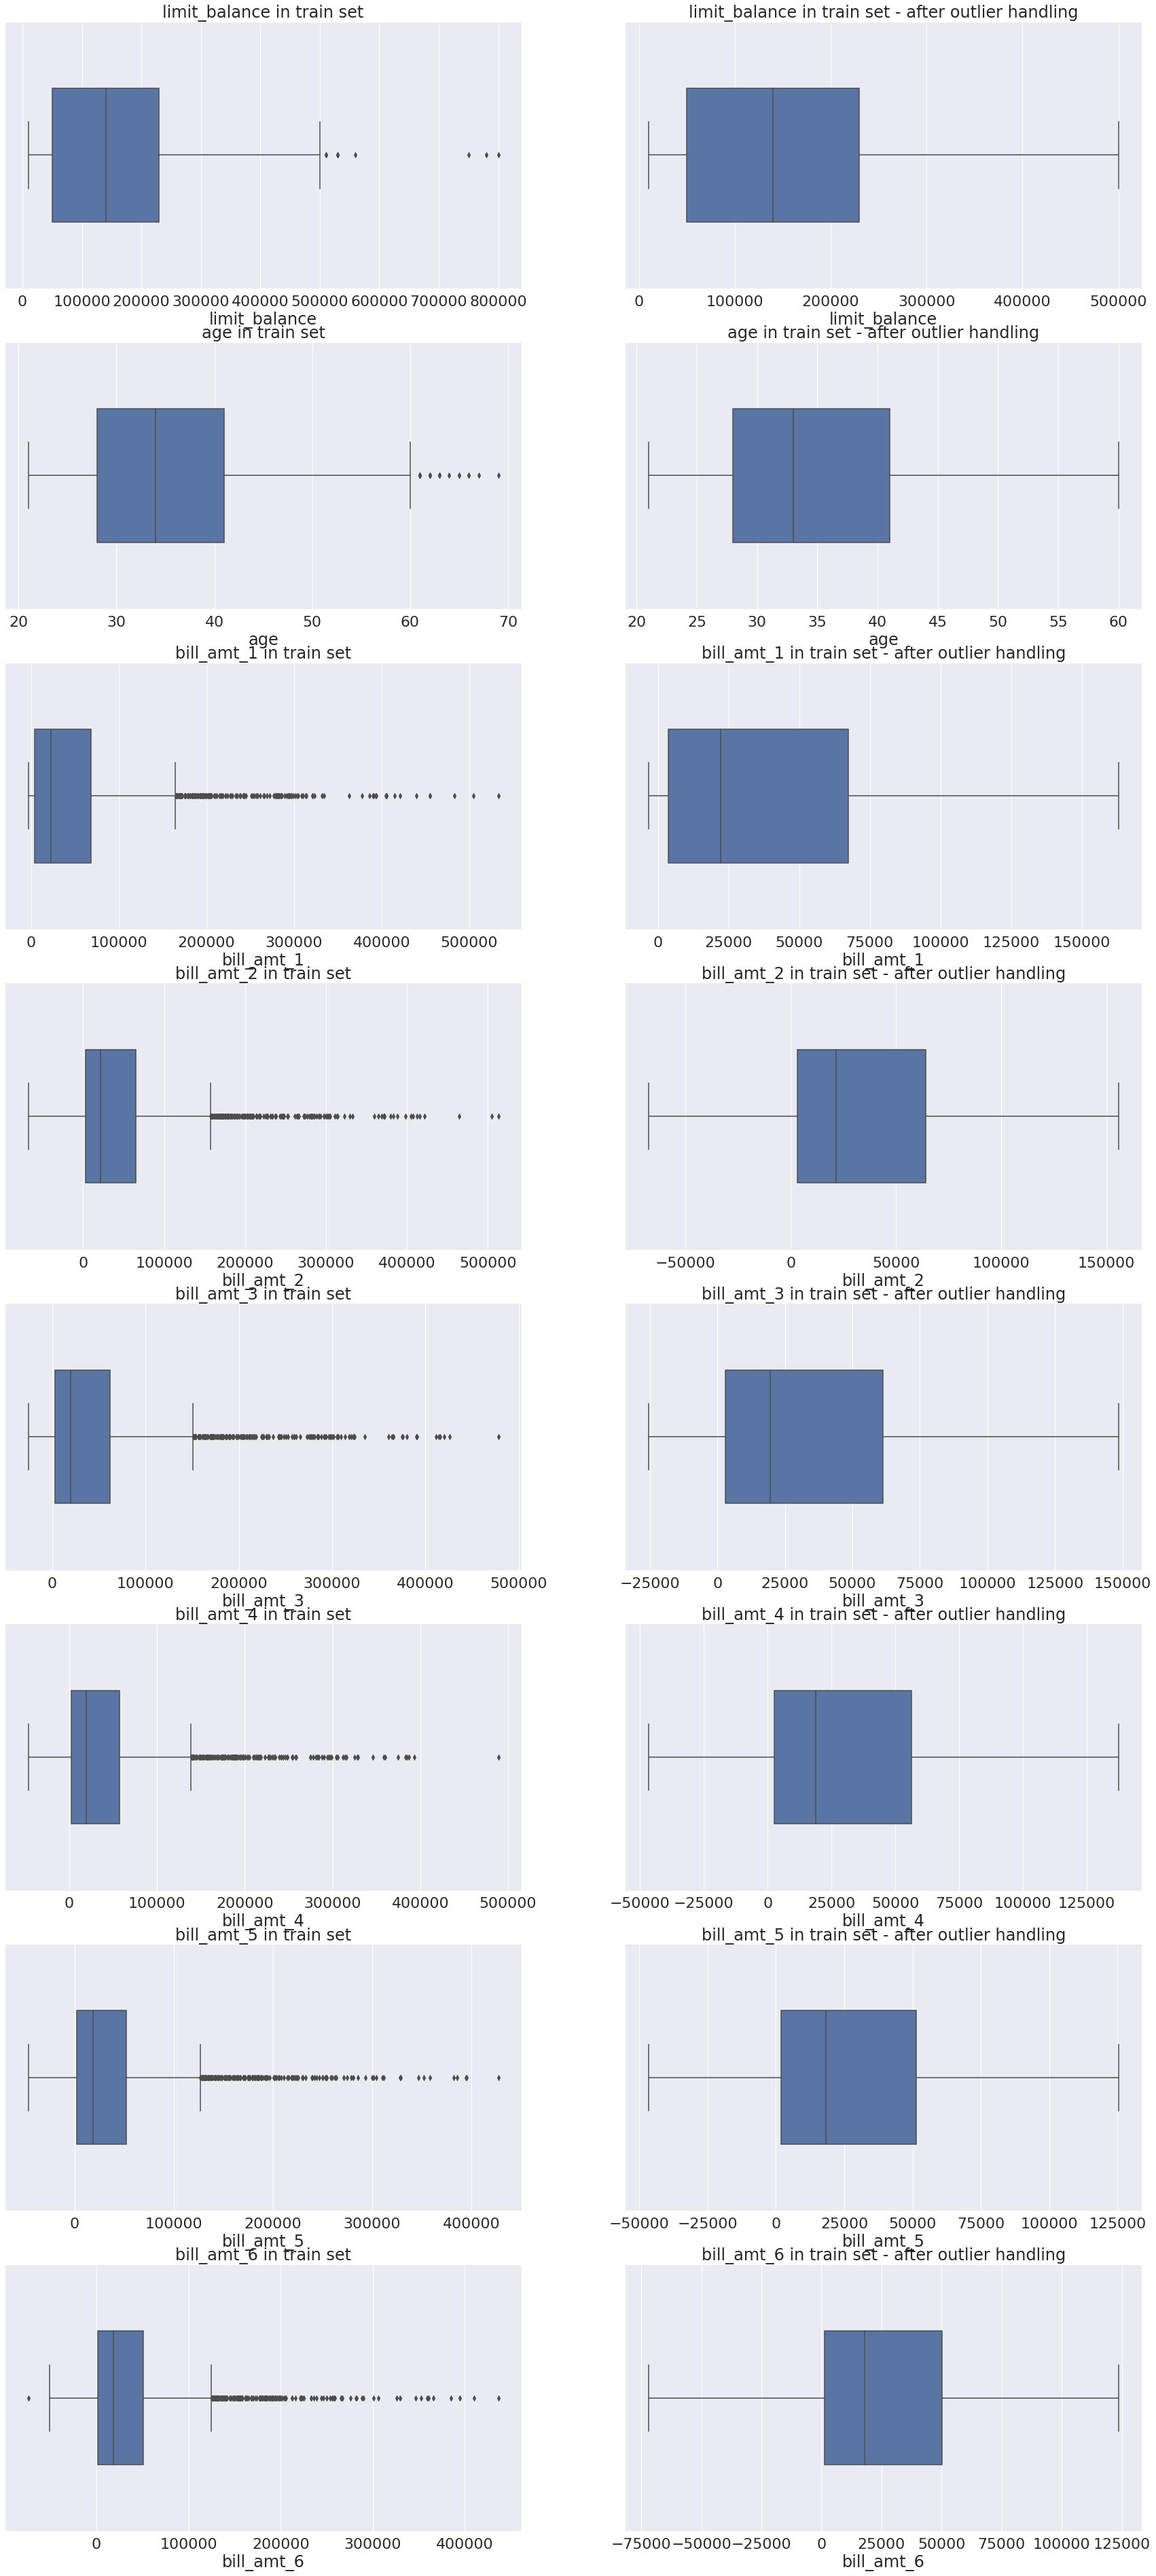

In [ ]:
# Boxplot visualization
num = X_train[num_col_1]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i,0],data=X_train,x=X_train[col],width=0.50)
    ax[i,0].set_title(f'{col} in train set')
    sns.boxplot(ax=ax[i,1],data=X_train_capped,x=X_train_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} in train set - after outlier handling')

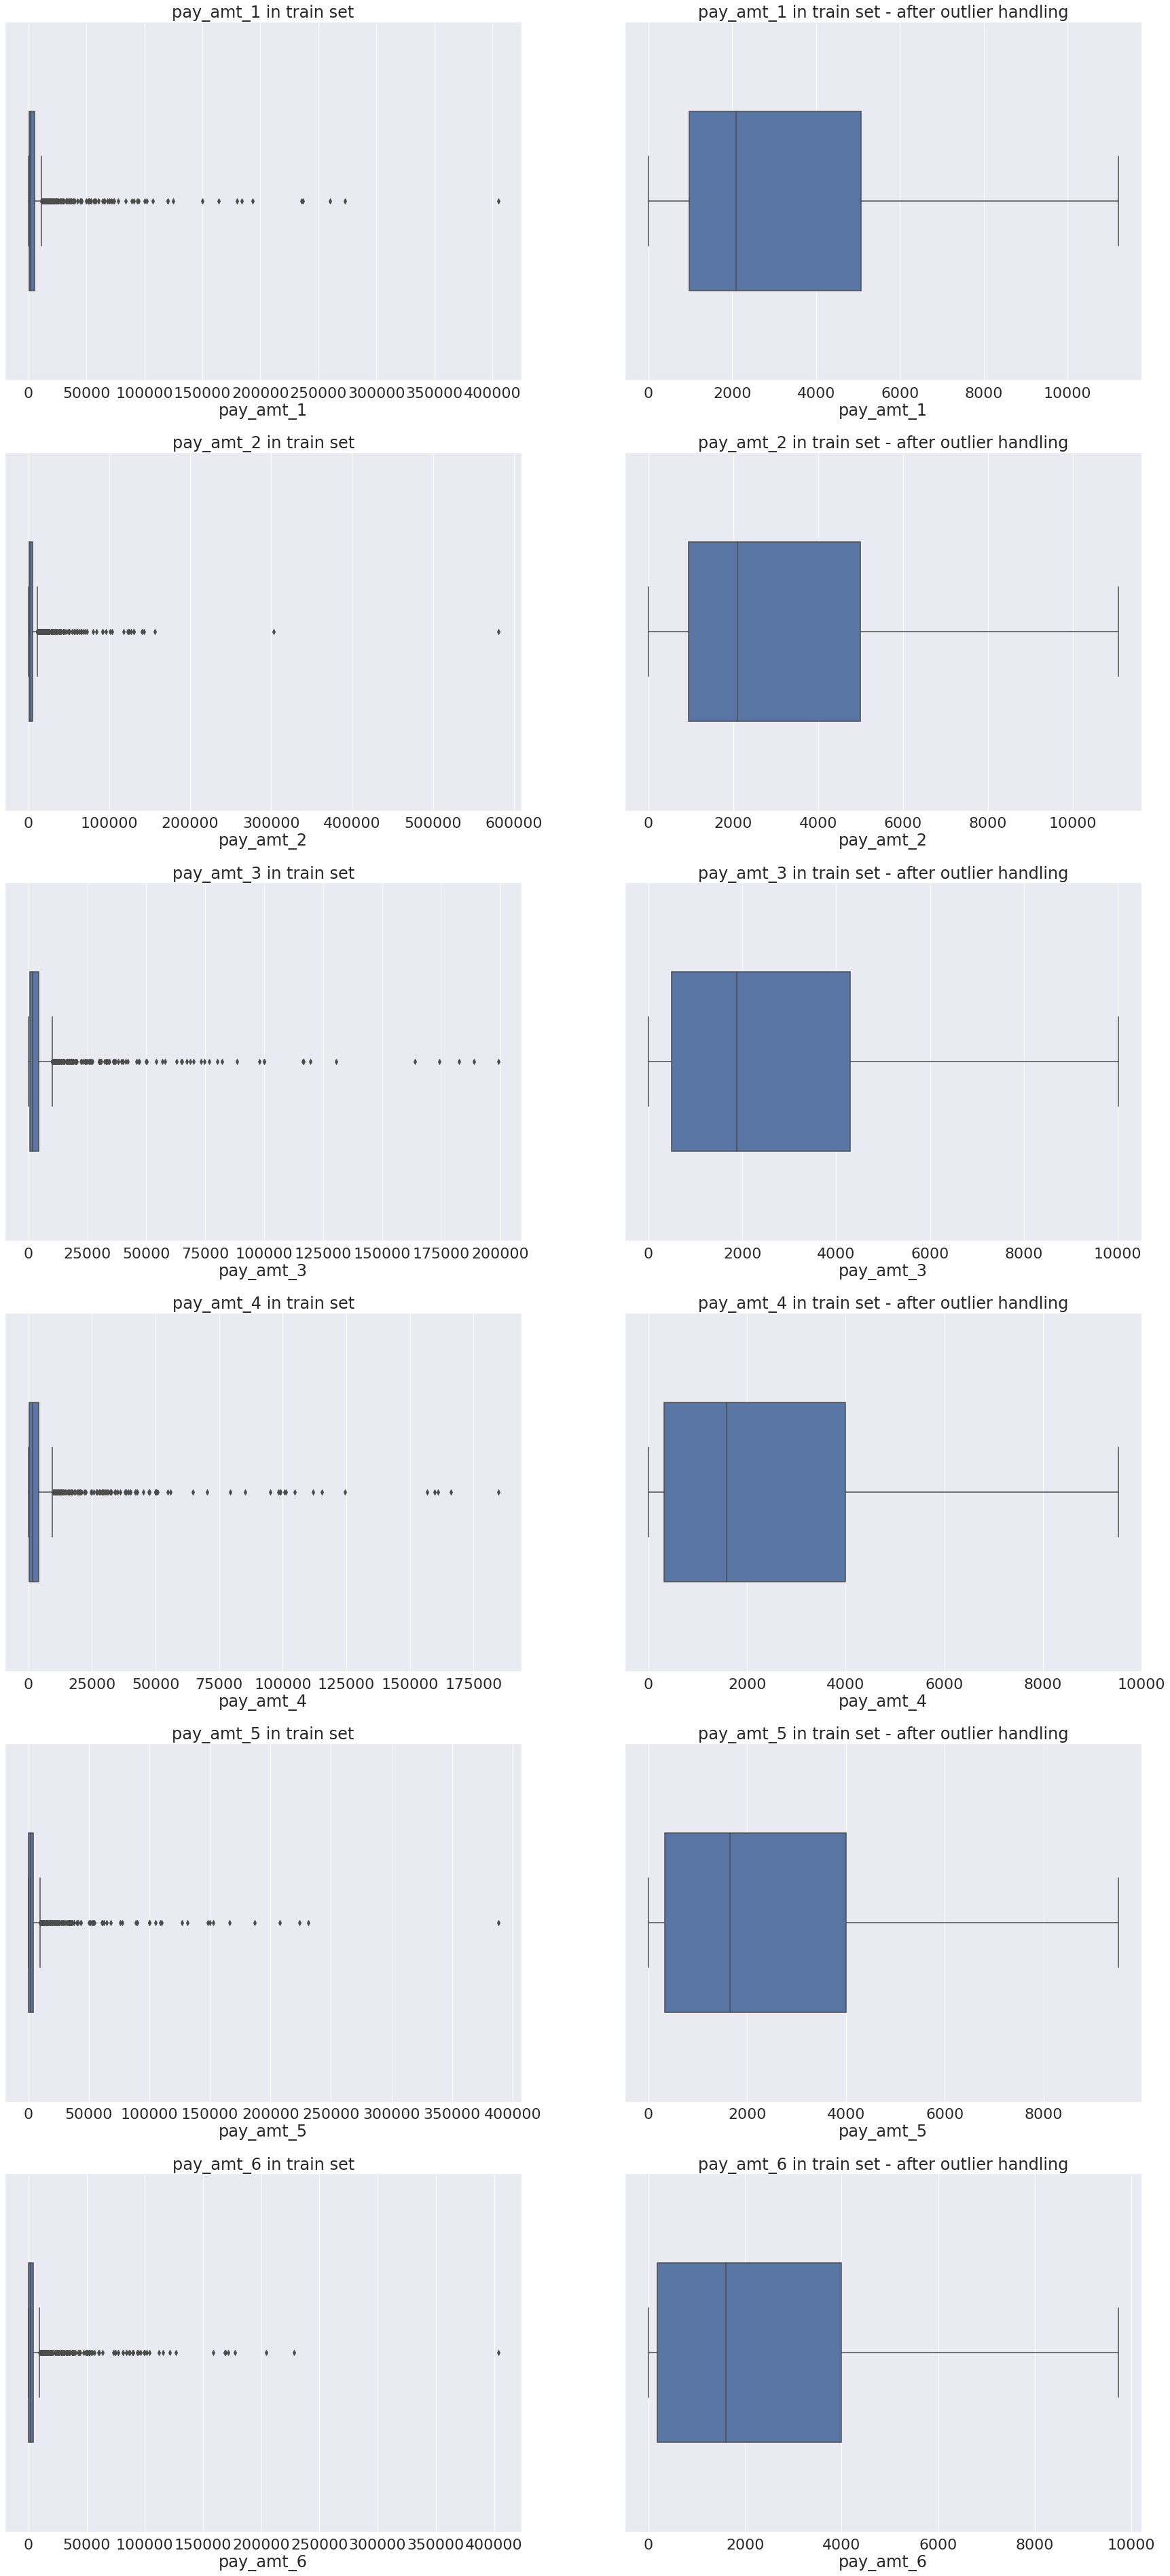

In [ ]:
# Boxplot visualization
num = X_train[num_col_2]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i,0],data=X_train,x=X_train[col],width=0.50)
    ax[i,0].set_title(f'{col} in train set')
    sns.boxplot(ax=ax[i,1],data=X_train_capped,x=X_train_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} in train set - after outlier handling')

### Test Set

In [ ]:
# percentage of outlier in test set
num = X_test[num_col]
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    out,no_out, up, low = outlier_analysis (X_test,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(X_test))*100, '%') 
    print('-'*20)

column name: limit_balance
count of outlier:  3
percentage of outlier:  0.3382187147688839 %
--------------------
column name: age
count of outlier:  8
percentage of outlier:  0.9019165727170236 %
--------------------
column name: bill_amt_1
count of outlier:  60
percentage of outlier:  6.764374295377677 %
--------------------
column name: bill_amt_2
count of outlier:  63
percentage of outlier:  7.1025930101465615 %
--------------------
column name: bill_amt_3
count of outlier:  63
percentage of outlier:  7.1025930101465615 %
--------------------
column name: bill_amt_4
count of outlier:  57
percentage of outlier:  6.426155580608793 %
--------------------
column name: bill_amt_5
count of outlier:  59
percentage of outlier:  6.6516347237880495 %
--------------------
column name: bill_amt_6
count of outlier:  60
percentage of outlier:  6.764374295377677 %
--------------------
column name: pay_amt_1
count of outlier:  79
percentage of outlier:  8.90642615558061 %
--------------------
colu

For columns with an outlier percentage less than 1%, handling outliers will be done using **trimming**, the rest will be handled using **capping**.

In [ ]:
# handling outlier in test set
X_test_trimmed = X_test.copy()
y_test_trimmed = y_test.copy()

num = X_test[num_col]
n=len(num.columns)
for i in range(n):
  col = num.columns[i]
  out,no_out, up, low = outlier_analysis(X_test_trimmed,col)
  pct_out = (len(out)/len(X_test))*100

  if pct_out <= 1: # outliers below 1% will be removed
    X_test_trimmed = X_test_trimmed[(X_test_trimmed[col]>=low) & (X_test_trimmed[col]<=up)]
    y_test_trimmed.drop(index = out.index,inplace=True)

print(f"Size of X_train set - before outlier handling: {len(X_test)}") 
print(f"Size of X_train set - after outlier handling: {len(X_test_trimmed)}")
print(f"Size of y_train set - before outlier handling: {len(y_test)}") 
print(f"Size of y_train set - after outlier handling: {len(y_test_trimmed)}")

Size of X_train set - before outlier handling: 887
Size of X_train set - after outlier handling: 876
Size of y_train set - before outlier handling: 887
Size of y_train set - after outlier handling: 876


In [ ]:
# capping outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_col)
X_test_capped = wins.fit_transform(X_test_trimmed)
print('Size of dataset - After Capped  : ', X_test_capped.shape)

Size of dataset - After Capped  :  (876, 23)


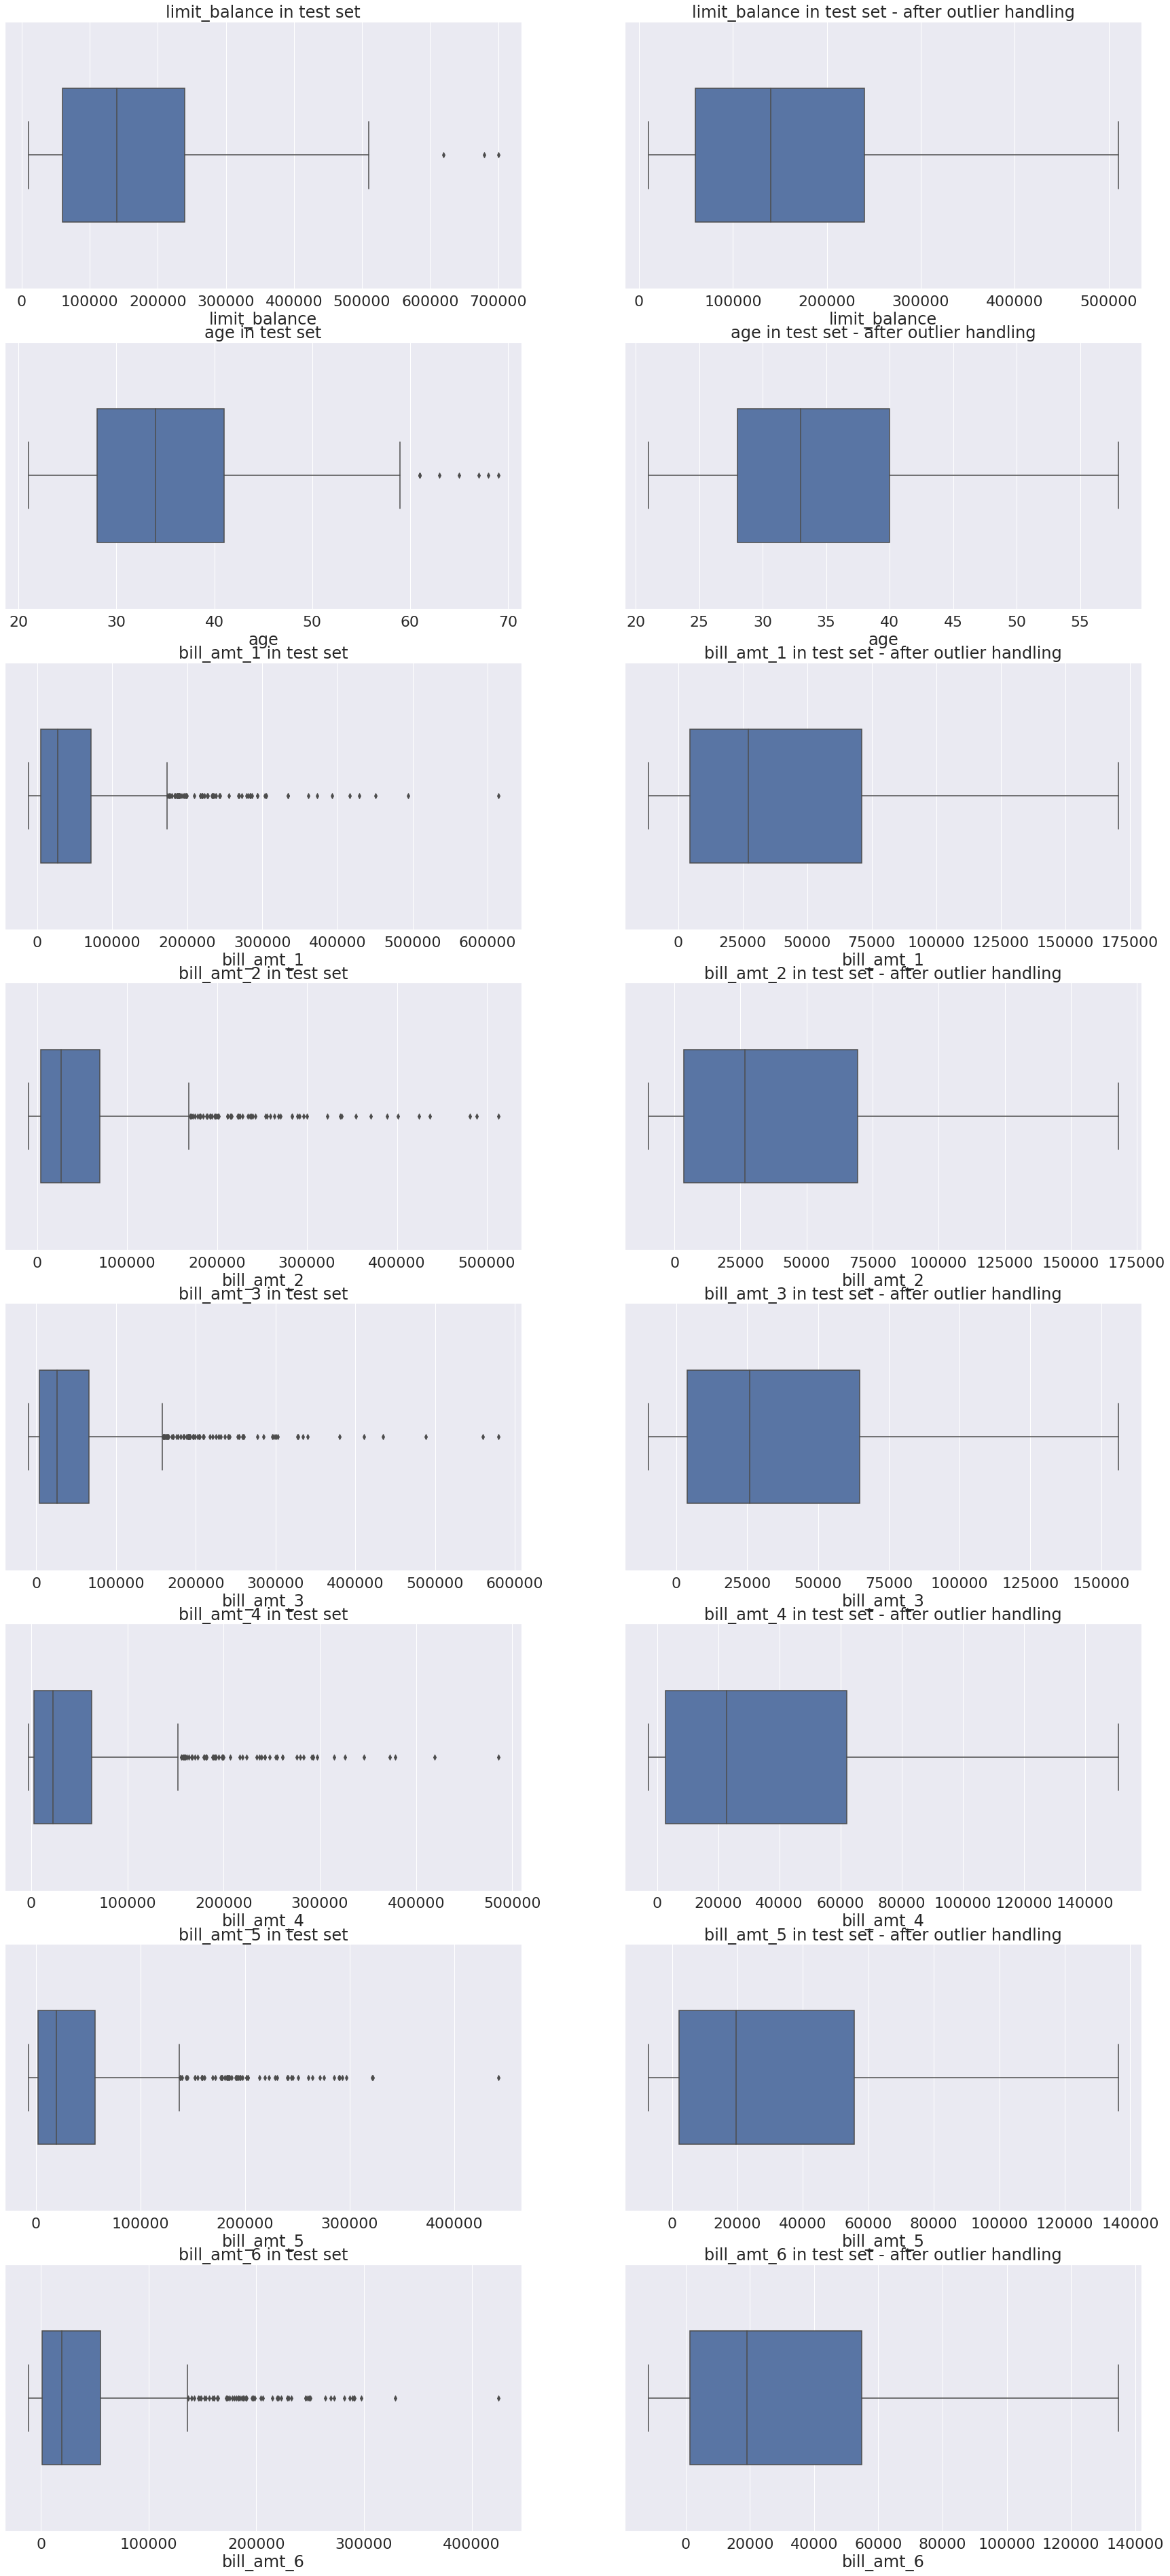

In [ ]:
# Boxplot visualization
num = X_test[num_col_1]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i,0],data=X_test,x=X_test[col],width=0.50)
    ax[i,0].set_title(f'{col} in test set')
    sns.boxplot(ax=ax[i,1],data=X_test_capped,x=X_test_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} in test set - after outlier handling')

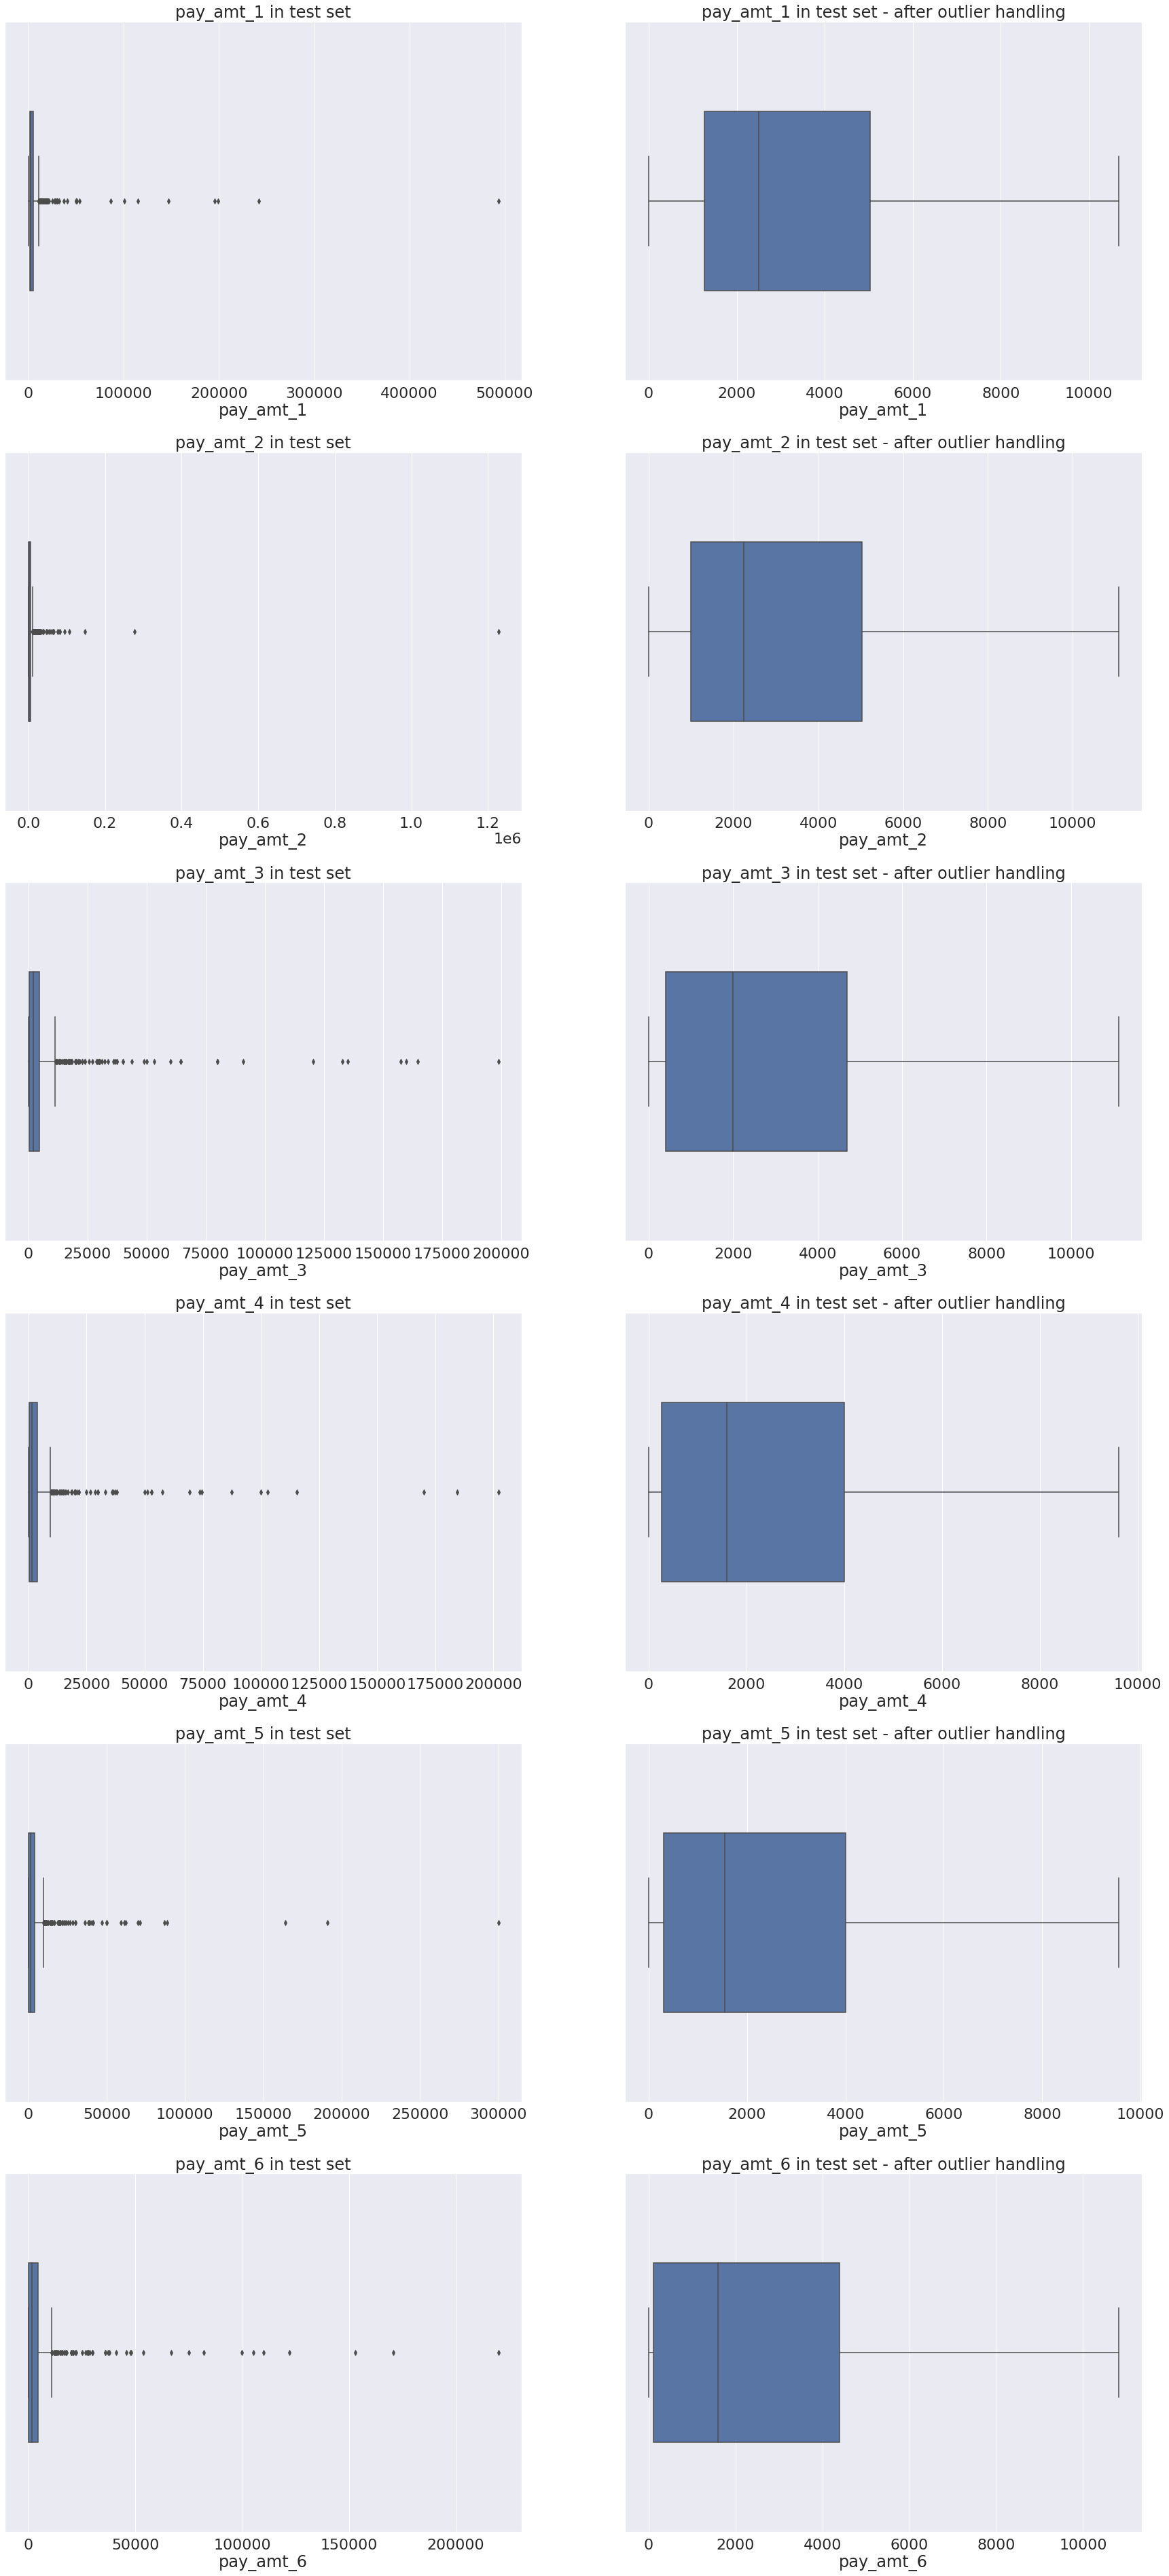

In [ ]:
# Boxplot visualization
num = X_test[num_col_2]
n=len(num.columns)
sns.set(font_scale=2)
fig, ax = plt.subplots(n,2,figsize=(30,68))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i,0],data=X_test,x=X_test[col],width=0.50)
    ax[i,0].set_title(f'{col} in test set')
    sns.boxplot(ax=ax[i,1],data=X_test_capped,x=X_test_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} in test set - after outlier handling')

## Feature Selection

In [ ]:
# Display X_train to see the features
X_train_capped.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,62290.0,29296.0,26210.0,17643.0,2545.00,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50942.0,50146.0,50235.0,48984.0,1689.00,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,15535.0,1434.0,500.0,0.0,4641.00,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27086.0,27821.0,30767.0,29890.0,5000.00,5000.0,1137.0,5000.0,1085.0,5000.0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0,...,64747.0,65150.0,-450.0,700.0,11209.25,1491.0,1303.0,0.0,2000.0,1400.0


In [ ]:
# Numerical columns list
print('Numerical Columns: ',num_col)
# Categorical Column list
print('Categorical Columns: ',cat_col)

Numerical Columns:  ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns:  ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']


In [ ]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(random_state=0)

#fit to the data
featimpt.fit(X_train_capped,y_train_trimmed)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train_capped.columns)
scorepercolumn.sort_values(ascending=False)

pay_0              0.109846
limit_balance      0.060511
age                0.059193
pay_2              0.050097
bill_amt_1         0.049105
pay_amt_6          0.049028
bill_amt_6         0.048459
bill_amt_4         0.048047
pay_amt_2          0.047748
bill_amt_3         0.045788
pay_amt_3          0.045188
bill_amt_2         0.045018
bill_amt_5         0.044999
pay_amt_1          0.044805
pay_amt_4          0.042852
pay_amt_5          0.042697
pay_3              0.034858
pay_6              0.031288
pay_5              0.028056
pay_4              0.027058
education_level    0.019396
marital_status     0.013481
sex                0.012482
dtype: float64

`education_level`, `marital_status`, and `sex` column will be dropped due to low scores.

In [ ]:
# Drop Unnecessary Features
X_train_capped = X_train_capped.drop(['sex','marital_status','education_level'],axis=1).sort_index()
X_test_capped = X_test_capped.drop(['sex','marital_status','education_level'],axis=1).sort_index()
X_train_capped

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,54.0,0.0,0.0,0.0,0.0,0,0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.00,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,49.0,0.0,0.0,0.0,0.0,0,0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.00,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,22.0,0.0,0.0,0.0,0.0,0,0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.00,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,33.0,0.0,0.0,0.0,0.0,0,0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.00,5000.0,1137.0,5000.0,1085.0,5000.0
5,300000.0,32.0,0.0,0.0,0.0,0.0,0,-1,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,11209.25,1491.0,1303.0,0.0,2000.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,28.0,-1.0,-1.0,-1.0,-2.0,-2,-2,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.00,0.0,0.0,0.0,0.0,0.0
2961,50000.0,51.0,-1.0,-1.0,-1.0,-1.0,-2,-2,752.0,300.0,5880.0,0.0,0.0,0.0,300.00,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,38.0,-2.0,-2.0,-2.0,-2.0,-2,-2,390.0,390.0,390.0,390.0,390.0,390.0,390.00,780.0,390.0,390.0,390.0,390.0
2963,50000.0,44.0,-2.0,-2.0,-2.0,-2.0,-2,-2,1473.0,390.0,390.0,390.0,390.0,0.0,390.00,390.0,390.0,390.0,0.0,780.0


In [ ]:
num_col_features = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col_features = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
# Split Numerical Features
X_train_num = X_train_capped[num_col_features]
X_test_num = X_test_capped[num_col_features]

# Split Categorical Features
X_train_cat = X_train_capped[cat_col_features]
X_test_cat = X_test_capped[cat_col_features]

### Feature Scaling: MinMaxScaler

This section explains the process of creating a model with feature scaling: `MinMaxScaler`. `MinMaxScaler` is used for columns where the data is skewed distributed.

In [ ]:
# Feature Scaling: MinMaxScaler
X_train_num = X_train_num.sort_index()
X_test_num = X_test_num.sort_index()
X_train_num

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,54.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.00,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,49.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.00,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,22.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.00,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,33.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.00,5000.0,1137.0,5000.0,1085.0,5000.0
5,300000.0,32.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,11209.25,1491.0,1303.0,0.0,2000.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,28.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.00,0.0,0.0,0.0,0.0,0.0
2961,50000.0,51.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.00,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,38.0,390.0,390.0,390.0,390.0,390.0,390.0,390.00,780.0,390.0,390.0,390.0,390.0
2963,50000.0,44.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.00,390.0,390.0,390.0,0.0,780.0


In [ ]:
# Making feature scaling for numerical columns with MinMaxScaler
s_MinMaxScaler = MinMaxScaler()

X_train_num_scaled = s_MinMaxScaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index = X_train_num.index)

X_test_num_scaled = s_MinMaxScaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns, index = X_test_num.index)

X_train_num_scaled

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.142857,0.846154,0.389531,0.579477,0.504515,0.412590,0.423588,0.458142,0.227045,0.199462,0.133540,0.234325,0.056996,0.035785
1,0.387755,0.717949,0.315953,0.524775,0.439257,0.525895,0.563307,0.618391,0.150679,0.195488,0.249888,0.365345,0.262895,0.308491
2,0.020408,0.025641,0.137599,0.389559,0.235647,0.261179,0.274070,0.367931,0.414033,0.092053,0.089960,0.000000,0.157737,0.000000
3,0.510204,0.307692,0.130916,0.404770,0.302072,0.404574,0.450089,0.520762,0.446060,0.451681,0.113649,0.524921,0.114096,0.514152
5,0.591837,0.282051,0.345016,0.594832,0.518644,0.607432,0.268545,0.371510,1.000000,0.134691,0.130241,0.000000,0.210316,0.143963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,0.142857,0.179487,0.045646,0.315094,0.146312,0.253386,0.271162,0.367931,0.249794,0.000000,0.000000,0.000000,0.000000,0.000000
2961,0.081633,0.769231,0.024426,0.303893,0.180125,0.253386,0.271162,0.367931,0.026764,0.531177,0.000000,0.000000,0.000000,0.000000
2962,0.897959,0.435897,0.022248,0.304296,0.148555,0.255505,0.273430,0.369925,0.034793,0.070462,0.038982,0.040944,0.041012,0.040104
2963,0.081633,0.589744,0.028762,0.304296,0.148555,0.255505,0.273430,0.367931,0.034793,0.035231,0.038982,0.040944,0.000000,0.080208


In [ ]:
X_test_num_scaled

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
4,0.285714,0.282051,0.981771,0.610294,1.043124,1.071055,1.063934,1.056720,0.358543,1.000813,1.112062,0.482927,0.495189,0.575850
9,0.448980,0.692308,0.987545,1.027475,1.043124,0.826750,0.899830,0.930853,0.624484,0.596852,0.377130,0.450382,0.437878,0.205661
10,0.918367,0.717949,1.045398,1.054955,1.043124,1.073460,1.063934,1.056720,0.951926,1.000813,1.112062,1.009016,1.004259,1.028304
14,0.571429,0.641026,1.045398,1.054955,1.043124,0.729976,0.786543,0.640168,0.951926,0.542018,0.157229,0.171019,0.329039,1.112355
15,1.000000,0.230769,0.469786,0.641958,0.595035,0.682404,0.717152,0.766589,0.249794,0.316177,0.281673,0.287971,0.315474,1.028304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,0.346939,0.358974,0.031126,0.305192,0.148382,0.253386,0.271162,0.370048,0.052635,0.032521,0.000000,0.000000,0.043535,0.000000
2951,0.306122,0.487179,0.029959,0.315663,0.146312,0.253386,0.271162,0.367931,0.262373,0.000000,0.000000,0.000000,0.000000,0.000000
2954,0.591837,0.179487,0.120144,0.307029,0.242151,0.253386,0.271162,0.367931,0.089212,1.000813,0.000000,0.000000,0.000000,0.000000
2956,0.183673,0.487179,0.097360,0.337057,0.159981,0.253386,0.271162,0.367931,0.178424,0.214729,1.112062,0.000000,0.000000,0.000000


### Feature Encoded: OneHotEncoder

ection explains the process of creating a model with feature encoding: `OneHotEncoder`. `OneHotEncoder` is used for categorical columns where the data does not need to be sorted.

In [ ]:
# Making feature encoding for categorical columns with OneHotEncoder
e_OneHotEncoder = OneHotEncoder()

X_train_cat_encoded = e_OneHotEncoder.fit_transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded,index = X_train_cat.index)

X_test_cat_encoded = e_OneHotEncoder.transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, index = X_test_cat.index)

X_train_cat_encoded.head(10)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#showing feature names
X_train_cat_encoded.columns = e_OneHotEncoder.get_feature_names_out()
X_train_cat_encoded.head(10)

,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,...,pay_5_6,pay_5_7,pay_6_-2,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_6,pay_6_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_cat_encoded.head(10)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#showing feature names
X_test_cat_encoded.columns = e_OneHotEncoder.get_feature_names_out()
X_test_cat_encoded.head(10)

,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,...,pay_5_6,pay_5_7,pay_6_-2,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_6,pay_6_7
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Encoding: OrdinalEncoder (for target)
This section explains the process of creating a model with target encoding: `OrdinalEncoder`. `OrdinalEncoder` is used for categorical columns where data needs to be sorted.

In [ ]:
# Using OrdinalEncoder to encode target train and test set
t_OrdinalEncoder = OrdinalEncoder()

default_encode = y_train_trimmed.copy()
t_OrdinalEncoder.fit(default_encode[['default_payment_next_month']])
default_encode[['default_payment_next_month']] = t_OrdinalEncoder.transform(default_encode[['default_payment_next_month']])
default_encode = default_encode['default_payment_next_month']

y_train_final = pd.DataFrame(default_encode).sort_index()
y_train_final

,default_payment_next_month
0,1.0
1,0.0
2,1.0
3,0.0
5,0.0
...,...
2960,0.0
2961,1.0
2962,1.0
2963,0.0


In [ ]:
# Using OrdinalEncoder to encode target train and test set
default_encode = y_test_trimmed.copy()
default_encode[['default_payment_next_month']] = t_OrdinalEncoder.transform(default_encode[['default_payment_next_month']])
default_encode = default_encode['default_payment_next_month']

y_test_final = pd.DataFrame(default_encode).sort_index()
y_test_final

,default_payment_next_month
4,0.0
9,0.0
10,0.0
14,0.0
15,0.0
...,...
2949,0.0
2951,0.0
2954,0.0
2956,0.0


### Final Result From Data Preprocessing

The final result from data processing will show when numerical and categorical features are concatenated, and then the features with low correlation and chi2 will be removed. The numerical features is already scaled with `MinMaxScaler` and the categorical is encoded with `OneHotEncoder`.

In [ ]:
# Concatenate dataframe X_train_final
X_train_final = pd.concat([X_train_cat_encoded, X_train_num_scaled], axis=1)
X_train_final = X_train_final.sort_index()

# Concatenate dataframe X_test_final
X_test_final = pd.concat([X_test_cat_encoded, X_test_num_scaled], axis=1)
X_test_final = X_test_final.sort_index()

X_train_final

,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.504515,0.412590,0.423588,0.458142,0.227045,0.199462,0.133540,0.234325,0.056996,0.035785
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.439257,0.525895,0.563307,0.618391,0.150679,0.195488,0.249888,0.365345,0.262895,0.308491
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.235647,0.261179,0.274070,0.367931,0.414033,0.092053,0.089960,0.000000,0.157737,0.000000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.302072,0.404574,0.450089,0.520762,0.446060,0.451681,0.113649,0.524921,0.114096,0.514152
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.518644,0.607432,0.268545,0.371510,1.000000,0.134691,0.130241,0.000000,0.210316,0.143963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146312,0.253386,0.271162,0.367931,0.249794,0.000000,0.000000,0.000000,0.000000,0.000000
2961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.180125,0.253386,0.271162,0.367931,0.026764,0.531177,0.000000,0.000000,0.000000,0.000000
2962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148555,0.255505,0.273430,0.369925,0.034793,0.070462,0.038982,0.040944,0.041012,0.040104
2963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148555,0.255505,0.273430,0.367931,0.034793,0.035231,0.038982,0.040944,0.000000,0.080208


In [ ]:
X_test_final

,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.043124,1.071055,1.063934,1.056720,0.358543,1.000813,1.112062,0.482927,0.495189,0.575850
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.043124,0.826750,0.899830,0.930853,0.624484,0.596852,0.377130,0.450382,0.437878,0.205661
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.043124,1.073460,1.063934,1.056720,0.951926,1.000813,1.112062,1.009016,1.004259,1.028304
14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.043124,0.729976,0.786543,0.640168,0.951926,0.542018,0.157229,0.171019,0.329039,1.112355
15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.595035,0.682404,0.717152,0.766589,0.249794,0.316177,0.281673,0.287971,0.315474,1.028304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.148382,0.253386,0.271162,0.370048,0.052635,0.032521,0.000000,0.000000,0.043535,0.000000
2951,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146312,0.253386,0.271162,0.367931,0.262373,0.000000,0.000000,0.000000,0.000000,0.000000
2954,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.242151,0.253386,0.271162,0.367931,0.089212,1.000813,0.000000,0.000000,0.000000,0.000000
2956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159981,0.253386,0.271162,0.367931,0.178424,0.214729,1.112062,0.000000,0.000000,0.000000


In [ ]:
y_train_final

,default_payment_next_month
0,1.0
1,0.0
2,1.0
3,0.0
5,0.0
...,...
2960,0.0
2961,1.0
2962,1.0
2963,0.0


In [ ]:
y_test_final

,default_payment_next_month
4,0.0
9,0.0
10,0.0
14,0.0
15,0.0
...,...
2949,0.0
2951,0.0
2954,0.0
2956,0.0


---

# vii. Model Definition
> This section contains cells to define the model. The algorithms that will be used are : 
- LogisticRegression
- Support Vector Machine
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- Other Algorithms (AdaBoostClassifier)

In [ ]:
# num_colf = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
# cat_colf = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [ ]:
# preprocess = ColumnTransformer([
#     ('num_colf', MinMaxScaler(),num_colf),
#     ('cat_colf', OneHotEncoder(handle_unknown='ignore'),cat_colf)   
# ],remainder='passthrough')

In [ ]:
# m_LogisticRegression = Pipeline([('preprop', preprocess),('LogReg', LogisticRegression())])
# m_svm = Pipeline([('preprop', preprocess),('SVC', SVC())])
# prepmod_DT = Pipeline([('preprop', preprocess),('DT', DecisionTreeClassifier())])
# m_RandomForestClassifier = Pipeline([('preprop', preprocess),('RFC', RandomForestClassifier())])
# m_KNeighborsClassifier = Pipeline([('preprop', preprocess),('KNN', KNeighborsClassifier())])
# prepmod_NB = Pipeline([('preprop', preprocess),('NB', GaussianNB())])
# prepmod_AB = Pipeline([('preprop', preprocess),('AB', AdaBoostClassifier())])

In [ ]:
# Defining Logistic Regression
m_LogisticRegression = LogisticRegression()

# SVM Classifier model
m_svm = SVC()

# Defining DecisionTreeClassifier
m_DecisionTreeClassifier = DecisionTreeClassifier()

# Define RandomForestClassifier 
m_RandomForestClassifier = RandomForestClassifier()

# Define KNeighbotsClassifier
m_KNeighborsClassifier = KNeighborsClassifier()

# Define NaiveBayes
m_GaussianNB = GaussianNB()

# Define AdaBoostClassifier
m_AdaBoostClassifier = AdaBoostClassifier()

---

# viii. Model Training and Evaluation
> This section explains the process to train the model that we defined using the algorithm that has been determined in the previous chapter. Those algorithms will be checked its accuracy through cross-validation from the train dataset. The best __mean__ and __standard deviation__ will be the main algorithm, and proceeded to hyperparameter tuning process to get the more accurate model.

## Training and Evaluation (Default Parameters)

### Logistic Regression

In [ ]:
# Fitting LogReg model default parameters
m_LogisticRegression.fit(X_train_final,y_train_final)

LogisticRegression()

#### Cross-Validation - Logistic Regression

__accuracy score__

In [ ]:
# LogisticRegression
# Cross Validation using `cross_val_score` for train set
cv_logreg = cross_val_score(m_LogisticRegression, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_logreg)
print("f1 Score - Mean - Cross-Validation :", cv_logreg.mean())
print("f1 Score - Std - Cross-Validation  :", cv_logreg.std())

f1 Score - All - Cross Validation  : [0.17821782 0.53030303 0.45021645 0.64341085 0.02173913]
f1 Score - Mean - Cross-Validation : 0.36477745708992393
f1 Score - Std - Cross-Validation  : 0.2301368710880834


In [ ]:
# Predicting target (y_train and y_test) with Logistic Regresion
y_pred_train_logreg = m_LogisticRegression.predict(X_train_final)
y_pred_test_logreg = m_LogisticRegression.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_logreg = pd.DataFrame(data = y_pred_train_logreg, columns = ["Prediction Train"])
y_pred_test_logreg = pd.DataFrame(data = y_pred_test_logreg, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - Logistic Regression

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1584
         1.0       0.74      0.42      0.54       455

    accuracy                           0.84      2039
   macro avg       0.80      0.69      0.72      2039
weighted avg       0.83      0.84      0.82      2039



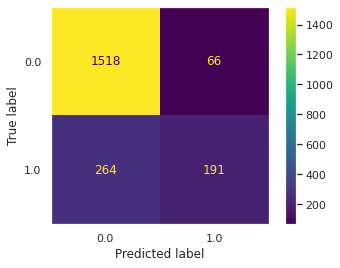

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_logreg))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_logreg, labels=m_LogisticRegression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_LogisticRegression.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91       702
         1.0       0.75      0.41      0.53       174

    accuracy                           0.86       876
   macro avg       0.81      0.69      0.72       876
weighted avg       0.84      0.86      0.84       876



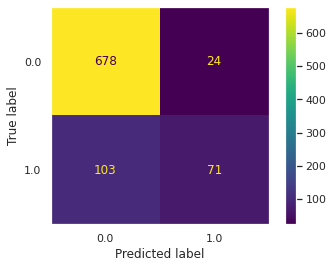

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_logreg))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_logreg, labels=m_LogisticRegression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_LogisticRegression.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
all_reports = {}
score_reports_logreg = {
    'train - precision' : precision_score(y_train_final, y_pred_train_logreg),
    'train - recall' : recall_score(y_train_final, y_pred_train_logreg),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_logreg),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_logreg),
    'test - precision' : precision_score(y_test_final, y_pred_test_logreg),
    'test - recall' : recall_score(y_test_final, y_pred_test_logreg),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_logreg),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_logreg),
}
all_reports['Baseline_LogReg'] = score_reports_logreg

### SVM

In [ ]:
# Fitting SVM model default parameters
m_svm.fit(X_train_final,y_train_final)

SVC()

#### Cross-Validation - SVM

__accuracy score__

In [ ]:
# SVM
# Cross Validation using `cross_val_score` for train set
cv_svm = cross_val_score(m_svm, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_svm)
print("f1 Score - Mean - Cross-Validation :", cv_svm.mean())
print("f1 Score - Std - Cross-Validation  :", cv_svm.std())

f1 Score - All - Cross Validation  : [0.22857143 0.5        0.47115385 0.7184466  0.08421053]
f1 Score - Mean - Cross-Validation : 0.40047648059656227
f1 Score - Std - Cross-Validation  : 0.2216216233735905


In [ ]:
# Predicting target (y_train and y_test) with SVM
y_pred_train_svm = m_svm.predict(X_train_final)
y_pred_test_svm = m_svm.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_svm = pd.DataFrame(data = y_pred_train_svm, columns = ["Prediction Train"])
y_pred_test_svm = pd.DataFrame(data = y_pred_test_svm, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - SVM

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91      1584
         1.0       0.77      0.43      0.55       455

    accuracy                           0.84      2039
   macro avg       0.81      0.70      0.73      2039
weighted avg       0.84      0.84      0.83      2039



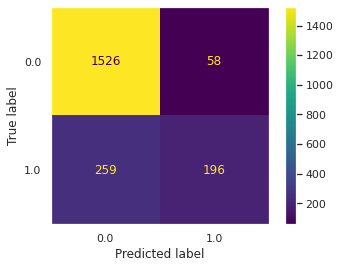

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_svm))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_svm, labels=m_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_svm.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       702
         1.0       0.72      0.43      0.53       174

    accuracy                           0.85       876
   macro avg       0.79      0.69      0.72       876
weighted avg       0.84      0.85      0.84       876



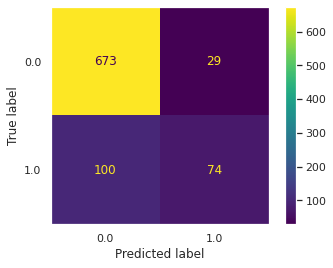

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_svm))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_svm, labels=m_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_svm.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
score_reports_svm = {
    'train - precision' : precision_score(y_train_final, y_pred_train_svm),
    'train - recall' : recall_score(y_train_final, y_pred_train_svm),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_svm),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_svm),
    'test - precision' : precision_score(y_test_final, y_pred_test_svm),
    'test - recall' : recall_score(y_test_final, y_pred_test_svm),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_svm),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_svm),
}
all_reports['Baseline_SVM'] = score_reports_svm

###  Decision Tree

In [ ]:
# Fitting Decision Tree default parameters
m_DecisionTreeClassifier.fit(X_train_final,y_train_final)

DecisionTreeClassifier()

#### Cross-Validation - Decision Tree

__accuracy score__

In [ ]:
# Decision Tree
# Cross Validation using `cross_val_score` for train set
cv_dt = cross_val_score(m_DecisionTreeClassifier, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_dt)
print("f1 Score - Mean - Cross-Validation :", cv_dt.mean())
print("f1 Score - Std - Cross-Validation  :", cv_dt.std())

f1 Score - All - Cross Validation  : [0.26356589 0.40641711 0.4        0.50675676 0.29249012]
f1 Score - Mean - Cross-Validation : 0.3738459758212331
f1 Score - Std - Cross-Validation  : 0.0873964073780292


In [ ]:
# Predicting target (y_train and y_test) with Decision Tree
y_pred_train_dt = m_DecisionTreeClassifier.predict(X_train_final)
y_pred_test_dt = m_DecisionTreeClassifier.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_dt = pd.DataFrame(data = y_pred_train_dt, columns = ["Prediction Train"])
y_pred_test_dt = pd.DataFrame(data = y_pred_test_dt, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - Decision Tree

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00       455

    accuracy                           1.00      2039
   macro avg       1.00      1.00      1.00      2039
weighted avg       1.00      1.00      1.00      2039



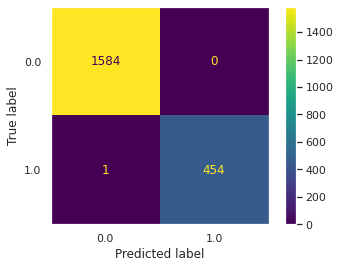

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_dt))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_dt, labels=m_DecisionTreeClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_DecisionTreeClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       702
         1.0       0.37      0.44      0.40       174

    accuracy                           0.74       876
   macro avg       0.61      0.63      0.62       876
weighted avg       0.76      0.74      0.75       876



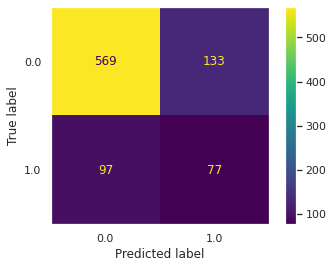

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_dt))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_dt, labels=m_DecisionTreeClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_DecisionTreeClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
score_reports_dt = {
    'train - precision' : precision_score(y_train_final, y_pred_train_dt),
    'train - recall' : recall_score(y_train_final, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_dt),
    'test - precision' : precision_score(y_test_final, y_pred_test_dt),
    'test - recall' : recall_score(y_test_final, y_pred_test_dt),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_dt),
}
all_reports['Baseline_dt'] = score_reports_dt

### Random Forest

In [ ]:
# Fitting Random Forest Model with default parameter
m_RandomForestClassifier.fit(X_train_final, y_train_final)

RandomForestClassifier()

#### Cross-Validation - Random Forest

__accuracy score__

In [ ]:
#RandomForest
# Cross Validation using `cross_val_score` for train set
cv_rf = cross_val_score(m_DecisionTreeClassifier, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_rf)
print("f1 Score - Mean - Cross-Validation :", cv_rf.mean())
print("f1 Score - Std - Cross-Validation  :", cv_rf.std())

f1 Score - All - Cross Validation  : [0.25396825 0.39378238 0.40677966 0.51178451 0.23529412]
f1 Score - Mean - Cross-Validation : 0.3603217855672926
f1 Score - Std - Cross-Validation  : 0.1031134275080097


In [ ]:
# Predicting target (y_train and y_test) with Random Forest
y_pred_train_rf = m_DecisionTreeClassifier.predict(X_train_final)
y_pred_test_rf = m_DecisionTreeClassifier.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_rf = pd.DataFrame(data = y_pred_train_rf, columns = ["Prediction Train"])
y_pred_test_rf = pd.DataFrame(data = y_pred_test_rf, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - Random Forest

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00       455

    accuracy                           1.00      2039
   macro avg       1.00      1.00      1.00      2039
weighted avg       1.00      1.00      1.00      2039



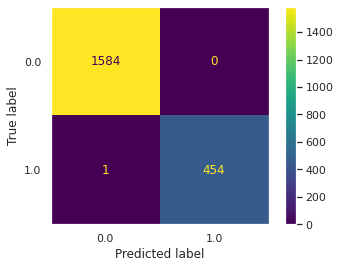

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_rf))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_rf, labels=m_DecisionTreeClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_DecisionTreeClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       702
         1.0       0.37      0.44      0.40       174

    accuracy                           0.74       876
   macro avg       0.61      0.63      0.62       876
weighted avg       0.76      0.74      0.75       876



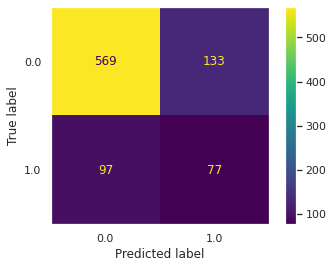

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_rf))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_rf, labels=m_DecisionTreeClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_DecisionTreeClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
score_reports_rf = {
    'train - precision' : precision_score(y_train_final, y_pred_train_rf),
    'train - recall' : recall_score(y_train_final, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_rf),
    'test - precision' : precision_score(y_test_final, y_pred_test_rf),
    'test - recall' : recall_score(y_test_final, y_pred_test_rf),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_rf),
}
all_reports['Baseline_rf'] = score_reports_rf

### KNN

In [ ]:
# Fitting KNN with default parameter
m_KNeighborsClassifier.fit(X_train_final, y_train_final)

KNeighborsClassifier()

#### Cross-Validation - KNN

__accuracy score__

In [ ]:
#KNN
# Cross Validation using `cross_val_score` for train set
cv_knn = cross_val_score(m_KNeighborsClassifier, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_knn)
print("f1 Score - Mean - Cross-Validation :", cv_knn.mean())
print("f1 Score - Std - Cross-Validation  :", cv_knn.std())

f1 Score - All - Cross Validation  : [0.17821782 0.43661972 0.4278607  0.61302682 0.04255319]
f1 Score - Mean - Cross-Validation : 0.3396556496044367
f1 Score - Std - Cross-Validation  : 0.2030989909144619


In [ ]:
# Predicting target (y_train and y_test) with KNN
y_pred_train_knn = m_KNeighborsClassifier.predict(X_train_final)
y_pred_test_knn = m_KNeighborsClassifier.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_knn = pd.DataFrame(data = y_pred_train_knn, columns = ["Prediction Train"])
y_pred_test_knn = pd.DataFrame(data = y_pred_test_knn, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - KNN

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1584
         1.0       0.75      0.51      0.61       455

    accuracy                           0.85      2039
   macro avg       0.81      0.73      0.76      2039
weighted avg       0.84      0.85      0.84      2039



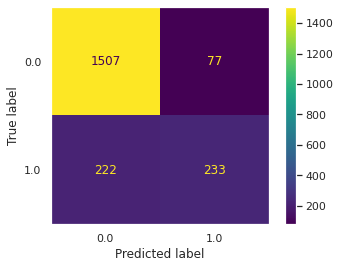

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_knn))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_knn, labels=m_KNeighborsClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_KNeighborsClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       702
         1.0       0.60      0.44      0.51       174

    accuracy                           0.83       876
   macro avg       0.74      0.68      0.70       876
weighted avg       0.82      0.83      0.82       876



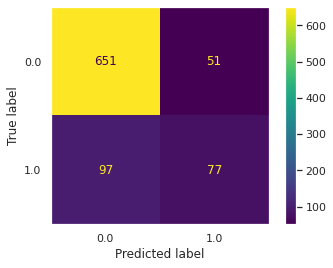

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_knn))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_knn, labels=m_KNeighborsClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_KNeighborsClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
score_reports_knn = {
    'train - precision' : precision_score(y_train_final, y_pred_train_knn),
    'train - recall' : recall_score(y_train_final, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_knn),
    'test - precision' : precision_score(y_test_final, y_pred_test_knn),
    'test - recall' : recall_score(y_test_final, y_pred_test_knn),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_knn),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_knn),
}
all_reports['Baseline_knn'] = score_reports_knn

###  Naive-Bayes

In [ ]:
# Fitting Naive-Bayes with default parameter
m_GaussianNB.fit(X_train_final,y_train_final)

GaussianNB()

#### Cross-Validation - NaiveBayes

__accuracy score__

In [ ]:
# Naive Bayes
# Cross Validation using `cross_val_score` for train set
cv_nb = cross_val_score(m_GaussianNB, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_nb)
print("f1 Score - Mean - Cross-Validation :", cv_nb.mean())
print("f1 Score - Std - Cross-Validation  :", cv_nb.std())

f1 Score - All - Cross Validation  : [0.         0.18       0.14814815 0.36437247 0.02173913]
f1 Score - Mean - Cross-Validation : 0.14285194964371165
f1 Score - Std - Cross-Validation  : 0.13080853384630894


In [ ]:
# Predicting target (y_train and y_test) with Naive Bayes
y_pred_train_gnb = m_GaussianNB.predict(X_train_final)
y_pred_test_gnb = m_GaussianNB.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_gnb = pd.DataFrame(data = y_pred_train_gnb, columns = ["Prediction Train"])
y_pred_test_gnb = pd.DataFrame(data = y_pred_test_gnb, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - Naive Bayes

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88      1584
         1.0       0.68      0.11      0.20       455

    accuracy                           0.79      2039
   macro avg       0.73      0.55      0.54      2039
weighted avg       0.77      0.79      0.73      2039



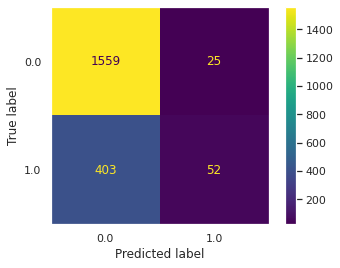

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_gnb))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_gnb, labels=m_GaussianNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_GaussianNB.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.89       702
         1.0       0.68      0.11      0.19       174

    accuracy                           0.81       876
   macro avg       0.75      0.55      0.54       876
weighted avg       0.79      0.81      0.75       876



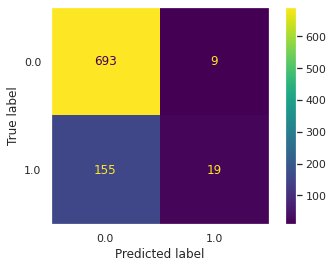

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_gnb))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_gnb, labels=m_GaussianNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_GaussianNB.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
score_reports_nb = {
    'train - precision' : precision_score(y_train_final, y_pred_train_gnb),
    'train - recall' : recall_score(y_train_final, y_pred_train_gnb),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_gnb),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_gnb),
    'test - precision' : precision_score(y_test_final, y_pred_test_gnb),
    'test - recall' : recall_score(y_test_final, y_pred_test_gnb),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_gnb),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_gnb),
}
all_reports['Baseline_nb'] = score_reports_nb

### AdaBoostClassifier

In [ ]:
# Fitting Naive-Bayes with default parameter
m_AdaBoostClassifier.fit(X_train_final, y_train_final)

AdaBoostClassifier()

#### Cross-Validation - AdaBoostClassifier

__accuracy score__

In [ ]:
# AdaBoostClassifier
# Cross Validation using `cross_val_score` for train set
cv_ada = cross_val_score(m_AdaBoostClassifier, 
                                  X_train_final, 
                                  y_train_final, 
                                  cv=5, 
                                  scoring='f1')

print("f1 Score - All - Cross Validation  :", cv_ada)
print("f1 Score - Mean - Cross-Validation :", cv_ada.mean())
print("f1 Score - Std - Cross-Validation  :", cv_ada.std())

f1 Score - All - Cross Validation  : [0.10309278 0.48062016 0.4787234  0.60740741 0.02150538]
f1 Score - Mean - Cross-Validation : 0.3382698253101454
f1 Score - Std - Cross-Validation  : 0.23154862099802345


In [ ]:
# Predicting target (y_train and y_test) with AdaBoostClassifier
y_pred_train_ada = m_AdaBoostClassifier.predict(X_train_final)
y_pred_test_ada = m_AdaBoostClassifier.predict(X_test_final)

# Creating target prediction dataframe
y_pred_train_ada = pd.DataFrame(data = y_pred_train_ada, columns = ["Prediction Train"])
y_pred_test_ada = pd.DataFrame(data = y_pred_test_ada, columns = ["Prediction Test"])

#### Classification Report & Confusion Matrix - AdaBoostClassifier

- __Train Set__

---------Classification Report (Train Set)---------
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1584
         1.0       0.75      0.42      0.54       455

    accuracy                           0.84      2039
   macro avg       0.80      0.69      0.72      2039
weighted avg       0.83      0.84      0.82      2039



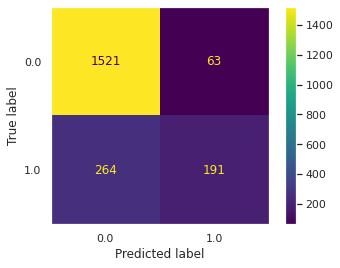

In [ ]:
# Determining classification report for train set
print('---------Classification Report (Train Set)---------')
print(classification_report(y_train_final,y_pred_train_ada))

# Creating confusion matrix for train set
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_ada, labels=m_AdaBoostClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_AdaBoostClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

- __Test Set__

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       702
         1.0       0.72      0.41      0.52       174

    accuracy                           0.85       876
   macro avg       0.79      0.68      0.72       876
weighted avg       0.84      0.85      0.83       876



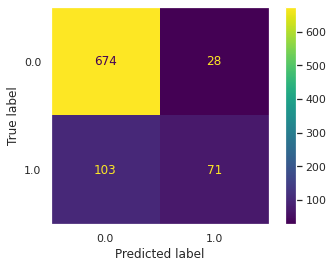

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test_final,y_pred_test_ada))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_ada, labels=m_AdaBoostClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_AdaBoostClassifier.classes_)

disp.plot()
plt.grid(False)
plt.show()

# Save Classification Report into a Dictionary
score_reports_ada = {
    'train - precision' : precision_score(y_train_final, y_pred_train_ada),
    'train - recall' : recall_score(y_train_final, y_pred_train_ada),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_ada),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_ada),
    'test - precision' : precision_score(y_test_final, y_pred_test_ada),
    'test - recall' : recall_score(y_test_final, y_pred_test_ada),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_ada),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_ada),
}
all_reports['Baseline_ada'] = score_reports_ada

### Summary of Baseline (Default Parameters)

In [ ]:
# All Reports
pd.DataFrame(all_reports)

,Baseline_LogReg,Baseline_SVM,Baseline_dt,Baseline_rf,Baseline_knn,Baseline_nb,Baseline_ada
train - precision,0.743191,0.771654,1.000000,1.000000,0.751613,0.675325,0.751969
train - recall,0.419780,0.430769,0.997802,0.997802,0.512088,0.114286,0.419780
train - accuracy,0.838156,0.844532,0.999510,0.999510,0.853359,0.790093,0.839627
train - f1_score,0.536517,0.552891,0.998900,0.998900,0.609150,0.195489,0.538787
test - precision,0.747368,0.718447,0.366667,0.366667,0.601562,0.678571,0.717172
test - recall,0.408046,0.425287,0.442529,0.442529,0.442529,0.109195,0.408046
test - accuracy,0.855023,0.852740,0.737443,0.737443,0.831050,0.812785,0.850457
test - f1_score,0.527881,0.534296,0.401042,0.401042,0.509934,0.188119,0.520147


In [ ]:
# create a new dataframe from cross validation score
crossval = [cv_logreg,cv_svm,cv_dt,cv_rf,cv_knn,cv_nb,cv_ada]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'SVM', 'Decision Tree','Random Forest','KNN', 'Naive Bayes' ,'AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Algorithm Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)     

,Algorithm Model,Mean,Std
0,SVM,0.400,0.222
1,Decision Tree,0.374,0.087
2,Logistic Regression,0.365,0.230
3,Random Forest,0.360,0.103
4,KNN,0.340,0.203
5,AdaBoost,0.338,0.232
6,Naive Bayes,0.143,0.131


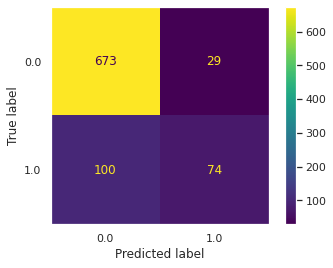

In [ ]:
# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_svm, labels=m_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_svm.classes_)

disp.plot()
plt.grid(False)
plt.show()

In [ ]:
all_reports['Baseline_SVM']

{'train - precision': 0.7716535433070866,
 'train - recall': 0.4307692307692308,
 'train - accuracy': 0.8445316331535067,
 'train - f1_score': 0.5528913963328632,
 'test - precision': 0.7184466019417476,
 'test - recall': 0.42528735632183906,
 'test - accuracy': 0.8527397260273972,
 'test - f1_score': 0.5342960288808665}

Based on the cross-validation score, the `SVM` algorithm has the highest **mean value (0.400)** and a **low standard deviation value (0.222)**. Hyperparameter tuning is then performed using this algorithm. 



## Hyperparameter Tuning

### Grid Search

This section describes the hyperparameter tuning of the `SVM` algorithm model using GridSearchCV. The results of the model evaluation of the hyperparameter tuning are then compared with the baseline parameters.

In [ ]:
# create parameter grid
param_grid = [    
    {'C' : [100, 10, 1.0, 0.1, 0.01],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf','sigmoid'],
    'degree':[1,2,3,4,5,6]
            
    }
]

In [ ]:
%%time
# Train with Grid Search

svm_gcv = GridSearchCV(m_svm, param_grid = param_grid,refit = True,verbose=3)
svm_gcv.fit(X_train_final,y_train_final)
print("Tuned SVM Parameters: {}".format(svm_gcv.best_params_))
print("Best score is {}".format(svm_gcv.best_score_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=100, degree=1, gamma=1, kernel=rbf;, score=0.777 total time=   0.3s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=rbf;, score=0.748 total time=   0.3s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=rbf;, score=0.706 total time=   0.3s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=rbf;, score=0.728 total time=   0.4s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=rbf;, score=0.776 total time=   0.3s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=sigmoid;, score=0.716 total time=   0.1s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=sigmoid;, score=0.647 total time=   0.1s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=sigmoid;, score=0.750 total time=   0.1s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=sigmoid;, score=0.598 total time=   0.1s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=sigmoid;, score=0.541 total time=   0.1s
[CV 1/5] END C=100, degree=1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.2s
[

In [ ]:
# get best estimator
svm_gridcv_best = svm_gcv.best_estimator_

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1584
         1.0       0.77      0.33      0.46       455

    accuracy                           0.83      2039
   macro avg       0.80      0.65      0.68      2039
weighted avg       0.82      0.83      0.80      2039

Confusion Matrix Train Set


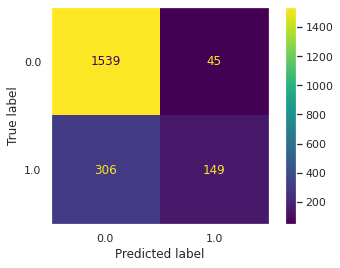

In [ ]:
# Check Performance Model against Train-Set

y_pred_train_svm_gcv = svm_gridcv_best.predict(X_train_final)
y_pred_test_svm_gcv = svm_gridcv_best.predict(X_test_final)

# Creating confusion matrix for train set
print('Classification Report : \n', classification_report(y_train_final, y_pred_train_svm_gcv))
print('Confusion Matrix Train Set')
cm = confusion_matrix(y_train_final, y_pred_train_svm_gcv, labels=svm_gridcv_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gridcv_best.classes_)

disp.plot()
plt.grid(False)
plt.show()

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       702
         1.0       0.74      0.37      0.49       174

    accuracy                           0.85       876
   macro avg       0.80      0.67      0.70       876
weighted avg       0.84      0.85      0.83       876

Confusion Matrix Test Set


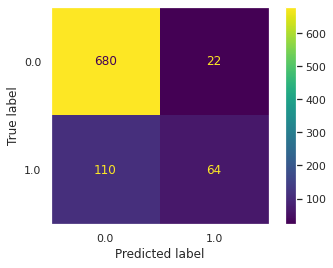

In [ ]:
# Creating confusion matrix for test set

print('Classification Report : \n', classification_report(y_test_final, y_pred_test_svm_gcv))
print('Confusion Matrix Test Set')
cm = confusion_matrix(y_test_final, y_pred_test_svm_gcv, labels=svm_gridcv_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gridcv_best.classes_)

disp.plot()
plt.grid(False)
plt.show()

In [ ]:
# Save Classification Report into a Dictionary
all_reports_hyper = {}
score_reports_baseline = {
    'train - precision' : precision_score(y_train_final, y_pred_train_svm),
    'train - recall' : recall_score(y_train_final, y_pred_train_svm),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_svm),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_svm),
    'test - precision' : precision_score(y_test_final, y_pred_test_svm),
    'test - recall' : recall_score(y_test_final, y_pred_test_svm),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_svm),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_svm),
}
all_reports_hyper['baseline'] = score_reports_baseline

score_reports_grid = {
    'train - precision' : precision_score(y_train_final, y_pred_train_svm_gcv),
    'train - recall' : recall_score(y_train_final, y_pred_train_svm_gcv),
    'train - accuracy' : accuracy_score(y_train_final, y_pred_train_svm_gcv),
    'train - f1_score' : f1_score(y_train_final, y_pred_train_svm_gcv),
    'test - precision' : precision_score(y_test_final, y_pred_test_svm_gcv),
    'test - recall' : recall_score(y_test_final, y_pred_test_svm_gcv),
    'test - accuracy' : accuracy_score(y_test_final, y_pred_test_svm_gcv),
    'test - f1_score' : f1_score(y_test_final, y_pred_test_svm_gcv),
}
all_reports_hyper['Grid Search'] = score_reports_grid


## Summary of Model Evaluation

Based on the model evaluation, the score of the `SVM` algorithm using baseline parameters is slightly greater than the score using hyperparameter tuning. This algorithm will be used as the algorithm in the inference model in the next chapter.

In [ ]:
# baseline parameter vs hyperparameter tuning 
pd.DataFrame(all_reports_hyper)

,baseline,Grid Search
train - precision,0.771654,0.768041
train - recall,0.430769,0.327473
train - accuracy,0.844532,0.827857
train - f1_score,0.552891,0.459168
test - precision,0.718447,0.744186
test - recall,0.425287,0.367816
test - accuracy,0.852740,0.849315
test - f1_score,0.534296,0.492308


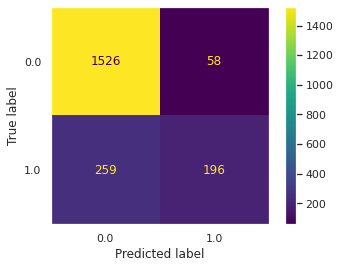

In [ ]:
# Creating confusion matrix for train set (baseline parameter)
sns.set(font_scale=1)
cm = confusion_matrix(y_train_final, y_pred_train_svm, labels=m_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_svm.classes_)

disp.plot()
plt.grid(False)
plt.show()

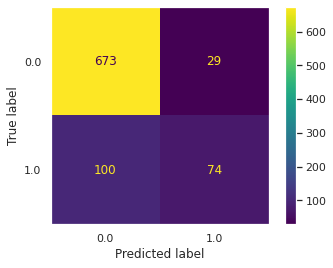

In [ ]:
# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test_final, y_pred_test_svm, labels=m_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_svm.classes_)

disp.plot()
plt.grid(False)
plt.show()

Based on the `accuracy` score on the train set (0.844) and test set (0.852), it can be said that this algorithm model is a **good fit** and also **accurate enough** to classify whether a credit card user will default on their credit card in the next month.

Although this model has a pretty good accuracy, this algorithm model has slightly low `f1_score`. The slightly low `f1_score` in the train set (0.553) and test set (0.534) is due to imbalanced data in the actual target in the dataset (actual positives are greater than negatives) which causes a low `recall` score.

`recall` score of 0.43 for train set and test set means that this model **only catches 43% of all the defaulters**. Which means **misses 57% of all defaulters**. This is not a good thing for banks that issue credit cards for letting a lot of non-loan-returning credit card defaulters go undetected.

---

# ix. Model Inference
> This section explains the process of saving and loading models and other files related to the results of the models that we created in the previous chapter. Since there are only 10 data, handling outliers could be skipped. From here, we can compare and observe if the actual data of `default_payment_next_month` is correct with the predicted classification.

## Saving and Loading Models

In [ ]:
# Saving Model Files

with open('m_svm.pkl', 'wb') as file_1:
  pickle.dump(m_svm, file_1)

with open('s_MinMaxScaler.pkl', 'wb') as file_2:
  pickle.dump(s_MinMaxScaler, file_2)

with open('e_OneHotEncoder.pkl', 'wb') as file_3:
  pickle.dump(e_OneHotEncoder, file_3)

with open('t_OrdinalEncoder.pkl', 'wb') as file_4:
  pickle.dump(t_OrdinalEncoder, file_4)

with open('num_col.txt', 'w') as file_5:
  json.dump(num_col, file_5)

with open('cat_col.txt','w') as file_6:  
  json.dump(cat_col, file_6)

In [ ]:
# Loading Model Files

with open('m_svm.pkl', 'rb') as file_1:
  m_svm = pickle.load(file_1)

with open('s_MinMaxScaler.pkl', 'rb') as file_2:
  s_MinMaxScaler = pickle.load(file_2)

with open('e_OneHotEncoder.pkl', 'rb') as file_3:
  e_OneHotEncoder = pickle.load(file_3)

with open('t_OrdinalEncoder.pkl', 'rb') as file_4:
  t_OrdinalEncoder = pickle.load(file_4)
  
with open('num_col.txt','r') as file_5:
  num_col = json.load(file_5)

with open('cat_col.txt','r') as file_6:
  cat_col = json.load(file_6)

## Features Selection

In [ ]:
# data inference
df_inf = pd.read_csv('/content/h8dsft_p1m1_Ahmad Luay Adnani_inference.csv')
df_inf_copy = df_inf.copy()
df_inf

,Unnamed: 0,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,118,300000.0,1,1,2,25.0,0.0,0.0,0.0,0.0,...,19507.0,18169.0,18533.0,4103.0,1427.0,600.0,1200.0,2500.0,18000.0,0
1,252,170000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,...,66496.0,36000.0,25167.0,3600.0,3000.0,4710.0,1500.0,1000.0,1000.0,0
2,599,420000.0,1,2,1,36.0,0.0,0.0,0.0,0.0,...,22304.0,28465.0,38182.0,15005.0,10013.0,10000.0,10000.0,20000.0,20000.0,0
3,723,130000.0,2,2,2,31.0,0.0,0.0,0.0,0.0,...,103750.0,105818.0,98401.0,4000.0,5300.0,3700.0,3600.0,3700.0,3500.0,0
4,1626,50000.0,1,2,2,28.0,-1.0,2.0,-1.0,0.0,...,937.0,-3.0,894.0,0.0,3141.0,2.0,0.0,897.0,906.0,0
5,1652,450000.0,2,3,2,40.0,-1.0,-1.0,-1.0,-1.0,...,14602.0,18065.0,19239.0,26731.0,55367.0,15174.0,10528.0,10037.0,48551.0,0
6,2337,240000.0,2,2,1,41.0,1.0,-1.0,-1.0,-1.0,...,9795.0,11756.0,12522.0,40529.0,3211.0,9795.0,11756.0,12522.0,6199.0,0
7,2414,30000.0,2,2,2,22.0,-1.0,0.0,-1.0,-1.0,...,3312.0,3145.0,3022.0,1009.0,5572.0,3321.0,3154.0,3031.0,3339.0,0
8,2629,100000.0,1,2,2,30.0,-2.0,-2.0,-2.0,-2.0,...,0.0,1756.0,0.0,1475.0,0.0,0.0,1756.0,0.0,0.0,0
9,2675,260000.0,2,3,2,49.0,-2.0,-2.0,-2.0,-2.0,...,2735.0,316.0,305.0,217773.0,200304.0,2759.0,316.0,305.0,2596.0,0


In [ ]:
# Split Numerical Features
df_inf_num = df_inf[num_col]

# Split Categorical Features
df_inf_cat = df_inf[cat_col]
df_inf_num

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,300000.0,25.0,76918.0,41773.0,31180.0,19507.0,18169.0,18533.0,4103.0,1427.0,600.0,1200.0,2500.0,18000.0
1,170000.0,29.0,90450.0,82581.0,81703.0,66496.0,36000.0,25167.0,3600.0,3000.0,4710.0,1500.0,1000.0,1000.0
2,420000.0,36.0,56068.0,55115.0,19304.0,22304.0,28465.0,38182.0,15005.0,10013.0,10000.0,10000.0,20000.0,20000.0
3,130000.0,31.0,97544.0,99208.0,102946.0,103750.0,105818.0,98401.0,4000.0,5300.0,3700.0,3600.0,3700.0,3500.0
4,50000.0,28.0,2809.0,187.0,3135.0,937.0,-3.0,894.0,0.0,3141.0,2.0,0.0,897.0,906.0
5,450000.0,40.0,5453.0,25948.0,53938.0,14602.0,18065.0,19239.0,26731.0,55367.0,15174.0,10528.0,10037.0,48551.0
6,240000.0,41.0,0.0,40529.0,3211.0,9795.0,11756.0,12522.0,40529.0,3211.0,9795.0,11756.0,12522.0,6199.0
7,30000.0,22.0,2293.0,3158.0,5547.0,3312.0,3145.0,3022.0,1009.0,5572.0,3321.0,3154.0,3031.0,3339.0
8,100000.0,30.0,914.0,1170.0,0.0,0.0,1756.0,0.0,1475.0,0.0,0.0,1756.0,0.0,0.0
9,260000.0,49.0,-5684.0,211466.0,200304.0,2735.0,316.0,305.0,217773.0,200304.0,2759.0,316.0,305.0,2596.0


### Feature Scaling: MinMaxScaler

In [ ]:
# Making feature scaling for numerical columns with MinMaxScaler
df_inf_num_scaled = s_MinMaxScaler.transform(df_inf_num)
df_inf_num_scaled = pd.DataFrame(df_inf_num_scaled, columns = df_inf_num.columns, index = df_inf_num.index)
df_inf_num_scaled

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.591837,0.102564,0.482543,0.489711,0.325615,0.359393,0.376825,0.462692,0.366037,0.128910,0.059973,0.125981,0.262895,1.850947
1,0.326531,0.205128,0.563934,0.672550,0.616151,0.614746,0.480522,0.496613,0.321163,0.271009,0.470788,0.157476,0.105158,0.102830
2,0.836735,0.384615,0.357136,0.549490,0.257321,0.374593,0.436702,0.563160,1.338627,0.904537,0.999550,1.049841,2.103160,2.056608
3,0.244898,0.256410,0.606603,0.747047,0.738310,0.817196,0.886553,0.871065,0.356848,0.478782,0.369834,0.377943,0.389085,0.359906
4,0.081633,0.179487,0.036798,0.303386,0.164340,0.258478,0.271145,0.372502,0.000000,0.283746,0.000200,0.000000,0.094327,0.093164
5,0.897959,0.487179,0.052701,0.418808,0.456486,0.332738,0.376220,0.466302,2.384727,5.001649,1.516717,1.105273,1.055471,4.992519
6,0.469388,0.512821,0.019903,0.484137,0.164777,0.306615,0.339530,0.431957,3.615675,0.290070,0.979059,1.234193,1.316788,0.637446
7,0.040816,0.025641,0.033694,0.316698,0.178210,0.271384,0.289452,0.383383,0.090015,0.503354,0.331951,0.331120,0.318734,0.343351
8,0.183673,0.230769,0.025400,0.307791,0.146312,0.253386,0.281374,0.367931,0.131588,0.000000,0.000000,0.184352,0.000000,0.000000
9,0.510204,0.717949,-0.014285,1.250016,1.298174,0.268249,0.273000,0.369491,19.427972,18.094718,0.275776,0.033175,0.032073,0.266948


### Feature Encoded: OneHotEncoder

In [ ]:
# dropping unnecessary features
df_inf_cat = df_inf_cat.drop(['sex','education_level','marital_status','default_payment_next_month'],axis=1).sort_index()
df_inf_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0,0
4,-1.0,2.0,-1.0,0.0,0,-1
5,-1.0,-1.0,-1.0,-1.0,0,0
6,1.0,-1.0,-1.0,-1.0,-1,-1
7,-1.0,0.0,-1.0,-1.0,-1,-1
8,-2.0,-2.0,-2.0,-2.0,-2,-2
9,-2.0,-2.0,-2.0,-2.0,-2,-2


In [ ]:
# Making feature encoding for categorical columns with OneHotEncoder
df_inf_cat_encoded = e_OneHotEncoder.transform(df_inf_cat).toarray()
df_inf_cat_encoded = pd.DataFrame(df_inf_cat_encoded, index = df_inf_cat.index)
df_inf_cat_encoded

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#showing feature names
df_inf_cat_encoded.columns = e_OneHotEncoder.get_feature_names_out()
df_inf_cat_encoded.head(10)

,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,...,pay_5_6,pay_5_7,pay_6_-2,pay_6_-1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_6,pay_6_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate Numerical Columns and Categorical Columns
df_inf_final = pd.concat([df_inf_cat_encoded,df_inf_num_scaled], axis=1)
df_inf_final

,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.325615,0.359393,0.376825,0.462692,0.366037,0.128910,0.059973,0.125981,0.262895,1.850947
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616151,0.614746,0.480522,0.496613,0.321163,0.271009,0.470788,0.157476,0.105158,0.102830
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.257321,0.374593,0.436702,0.563160,1.338627,0.904537,0.999550,1.049841,2.103160,2.056608
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.738310,0.817196,0.886553,0.871065,0.356848,0.478782,0.369834,0.377943,0.389085,0.359906
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164340,0.258478,0.271145,0.372502,0.000000,0.283746,0.000200,0.000000,0.094327,0.093164
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.456486,0.332738,0.376220,0.466302,2.384727,5.001649,1.516717,1.105273,1.055471,4.992519
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164777,0.306615,0.339530,0.431957,3.615675,0.290070,0.979059,1.234193,1.316788,0.637446
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178210,0.271384,0.289452,0.383383,0.090015,0.503354,0.331951,0.331120,0.318734,0.343351
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146312,0.253386,0.281374,0.367931,0.131588,0.000000,0.000000,0.184352,0.000000,0.000000
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.298174,0.268249,0.273000,0.369491,19.427972,18.094718,0.275776,0.033175,0.032073,0.266948


## Model Training

In [ ]:
# Predict using Logistic regression

y_pred_inf = m_LogisticRegression.predict(df_inf_final) #model_lin_reg from load files
y_pred_inf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Create default_payment_next_month Prediction DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['default_payment_next_month_prediction'],index=df_inf_final.index)
round(y_pred_inf_df.head(10),2)

,default_payment_next_month_prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
# Comparing the real default_payment_next_month and predicted classification
model_inf = pd.concat([df_inf_copy['default_payment_next_month'], y_pred_inf_df['default_payment_next_month_prediction']], axis=1).sort_index()
model_inf

,default_payment_next_month,default_payment_next_month_prediction
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


It can be concluded that the model that we define is quite accurate in predicting data inference. On the other hand, it should be noted that this model inference is just 10 data, which could be not enough to represent the accuracy.

---

# x. Conceptual Problems
> This section answers the conceptual problems:

1. Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
    
    [`criterion`](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d#:~:text=criterion%20%3A%20This%20parameter%20determines%20how,is%20set%20to%20%E2%80%9Cbest%E2%80%9D.) : This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity. 
    
    The criterion used in this case is gini. The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

2. Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !!
    
    [`Pruning`](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d#:~:text=criterion%20%3A%20This%20parameter%20determines%20how,is%20set%20to%20%E2%80%9Cbest%E2%80%9D.) is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.
    
    Pruning should reduce the size of a learning tree without reducing predictive accuracy as measured by a cross-validation set. There are many techniques for tree pruning that differ in the measurement that is used to optimize performance.

    Pruning processes can be divided into two types (pre- and post-pruning).

    - __Pre-pruning__ procedures prevent a complete induction of the training set by replacing a stop () criterion in the induction algorithm (e.g. max. Tree depth or information gain (Attr)> minGain). Pre-pruning methods are considered to be more efficient because they do not induce an entire set, but rather trees remain small from the start. Prepruning methods share a common problem, the horizon effect. This is to be understood as the undesired premature termination of the induction by the stop () criterion.

    - __Post-pruning__ (or just pruning) is the most common way of simplifying trees. Here, nodes and subtrees are replaced with leaves to reduce complexity. Pruning can not only significantly reduce the size but also improve the classification accuracy of unseen objects. It may be the case that the accuracy of the assignment on the train set deteriorates, but the accuracy of the classification properties of the tree increases overall.



3. Bagaimana cara memilih K yang optimal pada KNN ?
    
    By deciding number of neighbors (K) that will be used as the class. K in KNN is a parameter that refers to __the number of nearest neighbours to include in the majority of the voting process__. The small K value isn’t suitable for classification.

4. Jelaskan apa yang dimaksud dengan `Cross Validation` !
    
    Cross-validation is to assessing how the results of a statistical analysis that is generalized from an independent data set, which data comes from the training data. From here, __cross-validation can determine the best parameters__ that will be used in training the model to avoid default parameters from overfitting.

5. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

    - `Accuracy` is the ratio of the classification, or predictions if the model got right.
    
    - `Precision` is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

    - `Recall` is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

    - The `F1 score` is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

    - We can use `accuracy` when we are interested in __predicting both 0 and 1 correctly__ and our dataset is balanced enough. We use `precision` when we want the __prediction of 1 to be as correct as possible__ and we use `recall` when we want our model to __spot as many real 1 as possible__. 

---

# xi. Conclusion and Recommendation
> This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis: 
    - The number of female credit card users is 22% more than the number of male credit card users. Based on my assumptions, this is because women shop more often using credit cards than men. A number of 373 out of 2965 (or 13%) of female credit card users and 262 out of 2965 (or 9% ) of male credit card users will use the default payment system in the next month.
    - There is an imbalance in the number of credit card users who will default on their credit card the next month. This will affect the classification process by the model that we define (`precision` and `recall` value).
    - The majority of credit card users are university graduates (2). Based on my assumption, the higher the education level, the greater the desire to shop using a credit card.
    - The majority of credit card users are single. based on my assumption, married credit card users only have 1 credit card for 1 household.
    - The `education_level`, `sex`, `marital_status` has a low correlation to the target (`default_payment_next_month`).

2. Based on Model Evaluation: 
    - Based on the cross-validation score, the `SVM` algorithm has the highest **mean value (0.803)** and a **low standard deviation value (0.044)**. Hyperparameter tuning is then performed using this algorithm.

    - After using hyperparameter tuning, the score of the `SVM` algorithm using baseline parameters is slightly greater than the score using hyperparameter tuning. This algorithm will be used as the algorithm in the inference model in the next chapter. 

    - Based on the `accuracy` score on the train set (0.844) and test set (0.852), it can be said that this algorithm model is a **good fit** and also **accurate enough** to classify whether a credit card user will default on their credit card in the next month.

    - Although this model has a pretty good accuracy, this algorithm model has slightly low `f1_score`. The slightly low `f1_score` in the train set (0.553) and test set (0.534) is due to imbalanced data in the actual target in the dataset (actual positives are greater than negatives) which causes a low `recall` score.

    - `recall` score of 0.43 for train set and test set means that this model **only catches 43% of all the defaulters**. Which means **misses 57% of all defaulters**. This is not a good thing for banks that issue credit cards for letting a lot of non-loan-returning credit card defaulters go undetected.

3. Further improvement: 
    - As already explained from EDA that there is an **imbalance** in the number of credit card users who will default on their credit card the next month. Perhaps for the next model creation, handling imbalanced datasets in feature engineering can be done.